## Data-Driven Process Optimization of P3HT Devices
### Group 1: Ian Clark, Aaron Liu, Lily Luan, Young Hee Yoon

## 1. Dataset Import and Preparation

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from pyomo.environ import *

In [2]:
# read dataset located in data folder using pandas

df = pd.read_excel('P3HT-Database-McBride-Persson.xlsx') #pd.read_excel() or pd.read_csv() are file read options
df


,Author,Year,DOI,Mn (kDa),Mw (kDa),PDI,RR,Initial Concentration (mg/ml),Solv1,Solv2,...,Ann Time (Hours),Mobility Environment,OFET Regieme,OFET Configuration,Channel Length (um),Channel Width (mm),Vds (V),Electrode Material,Deposition Method,Mobility (cm^2/V-s)
0,Aiyar,2011,10.1002/adfm.201002729',24.0,47.7,1.9875,93,4.0,'CHCl3',NaN,...,NaN,'Air','Linear','BGBC',50.0,2.0,-3.0,'Au','SPUN',0.000202
1,Aiyar,2011,'10.1002/adfm.201002729',24.0,47.7,1.9875,93,4.0,'CHCl3',NaN,...,NaN,'Air','Linear','BGBC',50.0,2.0,-3.0,'Au','SPUN',0.007190
2,Aiyar,2011,'10.1002/adfm.201002729',24.0,47.7,1.9875,93,4.0,'CHCl3',NaN,...,NaN,'Air','Linear','BGBC',50.0,2.0,-3.0,'Au','SPUN',0.029400
3,Aiyar,2011,'10.1002/adfm.201002729',24.0,47.7,1.9875,93,4.0,'CHCl3',NaN,...,NaN,'Air','Linear','BGBC',50.0,2.0,-3.0,'Au','SPUN',0.050600
4,Aiyar,2011,'10.1002/adfm.201002729',24.0,47.7,1.9875,93,4.0,'CHCl3',NaN,...,NaN,'Air','Linear','BGBC',50.0,2.0,-3.0,'Au','SPUN',0.030600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Zhao,2013,'10.1002/adfm.201301007',68.0,163.2,2.4000,'>90',3.5,'Toluene',NaN,...,NaN,'Air','Saturation','BGTC',30.0,0.5,NaN,'Au','SPUN',0.001020
214,Zhao,2013,'10.1002/adfm.201301007',68.0,163.2,2.4000,'>90',3.5,'Toluene',NaN,...,NaN,'Air','Saturation','BGTC',30.0,0.5,NaN,'Au','SPUN',0.003050
215,Zhao,2013,'10.1002/adfm.201301007',68.0,163.2,2.4000,'>90',3.5,'Toluene',NaN,...,NaN,'Air','Saturation','BGTC',30.0,0.5,NaN,'Au','SPUN',0.008030
216,Zhao,2013,'10.1002/adfm.201301007',68.0,163.2,2.4000,'>90',3.5,'Toluene',NaN,...,NaN,'Air','Saturation','BGTC',30.0,0.5,NaN,'Au','SPUN',0.009530


We will take a look at all the features present in the original dataset below:

In [3]:
df.columns

Index(['Author', 'Year', 'DOI', 'Mn (kDa)', 'Mw (kDa)', 'PDI', 'RR',
       'Initial Concentration (mg/ml)', 'Solv1', 'Solv2', 'VFSolv1',
       'Boiling Point ( C)', 'Hansen Radius', 'Age Time (Hours)',
       'Age Temp ( C)', 'Substrate Treatment', 'Process Environment',
       'Spin Rate (RPM)', 'Spin Time (s)', 'Dip Rate (mm/min)',
       'Dip Time (min)', 'Film Thickness (nm)', 'Anneal Temp (Celcius)',
       'Ann Time (Hours)', 'Mobility Environment', 'OFET Regieme',
       'OFET Configuration', 'Channel Length (um)', 'Channel Width (mm)',
       'Vds (V)', 'Electrode Material', 'Deposition Method',
       'Mobility (cm^2/V-s)'],
      dtype='object')

### Dropping Features
Based on a series of decisions informed by domain expertise, we have chosen to remove several columns:

In [4]:
df_filtered = df.drop(['Author', # For this project, we choose not to analyze publication metrics, 
                       'Year',   # even though they may be relevant
                       'DOI',
                       'RR', #Don't want to omit for scientific reasons, but for data reasons. Data types too heterogeneous
                       'Solv1', #The main solvent already has "Boiling Point" and "Hansen Radius" as descriptors
                       'Solv2', #We will ignore the presence of a secondary solvent; also too many missing values
                       'VFSolv1', #Associated with second solvent
                       'Age Temp ( C)', #Will be transfer
                       'Process Environment', #Should not be very sensitive, also most expts. done under N2
                       'Film Thickness (nm)', #Should not be important, based on literature (cited in report)
                       'Channel Length (um)', #Sensitivity should be accounted for when extracting mobility from curve
                       'Channel Width (mm)', #Sensitivity should be accounted for when extracting mobility from curve
                       'Spin Rate (RPM)', #Will be transformed
                       'Spin Time (s)', #Will be transformed
                       'Mobility Environment', #Most values are the same, and this may not be very sensitive
                       'Dip Rate (mm/min)', #Will be transformed
                       'Dip Time (min)', #Will be transformed
                       'OFET Regieme', #Only affects the equation used on transfer curve to calculate mobility
                       'Vds (V)', #Sensitivity should be accounted for when extracting mobility from curve
                       'Electrode Material', #Sensitivity should be accounted for when extracting mobility from curve                     
                      ],axis=1) #still need to figure out how to drop rows with values in Solv2

df_filtered

,Mn (kDa),Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Age Time (Hours),Substrate Treatment,Anneal Temp (Celcius),Ann Time (Hours),OFET Configuration,Deposition Method,Mobility (cm^2/V-s)
0,24.0,47.7,1.9875,4.0,334.0,3.629738,NaN,NaN,NaN,NaN,'BGBC','SPUN',0.000202
1,24.0,47.7,1.9875,4.0,334.0,3.629738,NaN,NaN,NaN,NaN,'BGBC','SPUN',0.007190
2,24.0,47.7,1.9875,4.0,334.0,3.629738,NaN,NaN,NaN,NaN,'BGBC','SPUN',0.029400
3,24.0,47.7,1.9875,4.0,334.0,3.629738,NaN,NaN,NaN,NaN,'BGBC','SPUN',0.050600
4,24.0,47.7,1.9875,4.0,334.0,3.629738,NaN,NaN,NaN,NaN,'BGBC','SPUN',0.030600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,68.0,163.2,2.4000,3.5,384.0,4.042153,48.0,NaN,NaN,NaN,'BGTC','SPUN',0.001020
214,68.0,163.2,2.4000,3.5,384.0,4.042153,48.0,NaN,NaN,NaN,'BGTC','SPUN',0.003050
215,68.0,163.2,2.4000,3.5,384.0,4.042153,48.0,NaN,NaN,NaN,'BGTC','SPUN',0.008030
216,68.0,163.2,2.4000,3.5,384.0,4.042153,48.0,NaN,NaN,NaN,'BGTC','SPUN',0.009530


### Feature Transformation

Next, there are some features that we will choose to simplify based on the available information.

1. PDI = Mw/Mn. Some observations have 2 of 3 of the pieces of information available, and this equation can be used to fill in some of the rows
2. Substrate treatment: Given the small number of observations, we will transform this into a single binary variable. If any type of treatment was performed ('HMDS', 'OTS', etc.) then a value of 1 will be assigned. Else, 0.
3. Aging: If samples were aged or not, this will be transformed into a binary variable
4. Annealing information: This will also be transformed into a single binary variable based on the following criteria: If the annealing temperature is $\leq 25^oC$, or if the annealing time is reported as 0, then the binary variable will be set to zero. Otherwise, the sample was annealed and the value will be set to 1
5. There are some features associated with processing method, but here we will only consider whether a processing method was used or not. Therefore, the process specific features (Spin rate, spin time, dip rate, dip time) will be dropped in favor of one-hot encoding the 'Deposition Method' column

#### 1. Fill in PDI/Mw

In [5]:
# Mw reported, but no PDI
mask_noPDI = ~df_filtered['Mw (kDa)'].isna() & df_filtered['PDI'].isna()
drows_index = df_filtered[mask_noPDI].index
df_filtered.loc[drows_index,'PDI'] = (df_filtered['Mw (kDa)']/df_filtered['Mn (kDa)'])[mask_noPDI]

# PDI reported, but no Mw
mask_noMw = df_filtered['Mw (kDa)'].isna() & ~df_filtered['PDI'].isna()
drows_index = df_filtered[mask_noMw].index
df_filtered.loc[drows_index,'Mw (kDa)'] = (df_filtered['PDI']*df_filtered['Mn (kDa)'])[mask_noMw]

# Remaining data points missing Mw or PDI information:
print('Remaining data points missing Mw or PDI information: {}'.format(sum(df_filtered['Mw (kDa)'].isna() | df_filtered['PDI'].isna())))


Remaining data points missing Mw or PDI information: 64


#### 2. Transform 'Substrate Treatment'

In [6]:
## substrate treatment: all nan -> 0 all others -> 1

# df_filtered['Substrate Treatment'] = df_filtered['Substrate Treatment'].fillna(0)
# df_filtered[df_filtered['Substrate Treatment'] != 0] = 1

df_filtered['Substrate Treatment'] = (~df_filtered['Substrate Treatment'].isna()).astype(int)
df_filtered['Substrate Treatment'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 3. Transform 'Age Time' to 'Aged'

In [7]:
age_map = df_filtered['Age Time (Hours)'].fillna(0).apply(lambda x: x>0)
df_filtered['Aged'] = age_map.astype(int)
df_filtered = df_filtered.drop('Age Time (Hours)', axis=1)
df_filtered

,Mn (kDa),Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Anneal Temp (Celcius),Ann Time (Hours),OFET Configuration,Deposition Method,Mobility (cm^2/V-s),Aged
0,24.0,47.7,1.9875,4.0,334.0,3.629738,0,NaN,NaN,'BGBC','SPUN',0.000202,0
1,24.0,47.7,1.9875,4.0,334.0,3.629738,0,NaN,NaN,'BGBC','SPUN',0.007190,0
2,24.0,47.7,1.9875,4.0,334.0,3.629738,0,NaN,NaN,'BGBC','SPUN',0.029400,0
3,24.0,47.7,1.9875,4.0,334.0,3.629738,0,NaN,NaN,'BGBC','SPUN',0.050600,0
4,24.0,47.7,1.9875,4.0,334.0,3.629738,0,NaN,NaN,'BGBC','SPUN',0.030600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,68.0,163.2,2.4000,3.5,384.0,4.042153,0,NaN,NaN,'BGTC','SPUN',0.001020,1
214,68.0,163.2,2.4000,3.5,384.0,4.042153,0,NaN,NaN,'BGTC','SPUN',0.003050,1
215,68.0,163.2,2.4000,3.5,384.0,4.042153,0,NaN,NaN,'BGTC','SPUN',0.008030,1
216,68.0,163.2,2.4000,3.5,384.0,4.042153,0,NaN,NaN,'BGTC','SPUN',0.009530,1


#### 4. Transform 'Anneal Temp' and 'Anneal Time' into single binary 'Annealed'

In [8]:
# Annealing: Yes or no (if <=25 C or nan, then Annealing = 0, otherwise Annealing = 1)
df_filtered4 = df_filtered.copy()

# Fill nan values with 0
df_filtered4.loc[:,'Anneal Temp (Celcius)'] = df_filtered4.loc[:,'Anneal Temp (Celcius)'].fillna(0)

# All annealing temperatures higher than 25 are considered "Annealed"
anneal_map = df_filtered4.loc[:,'Anneal Temp (Celcius)'].apply(lambda x: x>25)
df_filtered4.loc[:,'Anneal Temp (Celcius)'] = anneal_map.astype(int)
df_filtered4.loc[:,'Anneal Temp (Celcius)'].values

# df_filtered[df_filtered['Anneal Temp. ©'] == 25] = 0
# df_filtered[df_filtered['Anneal Temp. ©'] > 25] = 1
# # df_filtered[df_filtered['Ann Time (Hours)'] == 0] = 0

# Rename Annealing Temp. to 'Annealed' and drop other annealing feature
df_filtered4 = df_filtered4.rename(columns={'Anneal Temp (Celcius)': 'Annealed'})
df_filtered4 = df_filtered4.drop(['Ann Time (Hours)'], axis = 1)
df_filtered4

,Mn (kDa),Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,OFET Configuration,Deposition Method,Mobility (cm^2/V-s),Aged
0,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,'BGBC','SPUN',0.000202,0
1,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,'BGBC','SPUN',0.007190,0
2,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,'BGBC','SPUN',0.029400,0
3,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,'BGBC','SPUN',0.050600,0
4,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,'BGBC','SPUN',0.030600,0
...,...,...,...,...,...,...,...,...,...,...,...,...
213,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,'BGTC','SPUN',0.001020,1
214,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,'BGTC','SPUN',0.003050,1
215,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,'BGTC','SPUN',0.008030,1
216,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,'BGTC','SPUN',0.009530,1


#### 5. One-hot encoding of 'Deposition Method' and 'OFET Configuration'

In [9]:
df_filtered5 = df_filtered4.copy()

#Perform one-hot encoding
df_filtered5 = pd.get_dummies(df_filtered5)
df_filtered5

,Mn (kDa),Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,Mobility (cm^2/V-s),Aged,OFET Configuration_'BGBC',OFET Configuration_'BGTC',Deposition Method_'DIPPED',Deposition Method_'DROPPED',Deposition Method_'SPUN'
0,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.000202,0,1,0,0,0,1
1,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.007190,0,1,0,0,0,1
2,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.029400,0,1,0,0,0,1
3,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.050600,0,1,0,0,0,1
4,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.030600,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.001020,1,0,1,0,0,1
214,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.003050,1,0,1,0,0,1
215,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.008030,1,0,1,0,0,1
216,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.009530,1,0,1,0,0,1


#### 6. Store inputs and output into numpy arrays

In [10]:
# Output
y = df_filtered5['Mobility (cm^2/V-s)'].values

# Input
X = df_filtered5.copy().drop(['Mobility (cm^2/V-s)'],axis=1).values

print('Dimensions of input matrix: {}'.format(X.shape))
print('Dimensions of output matrix: {}'.format(y.shape))

Dimensions of input matrix: (218, 14)
Dimensions of output matrix: (218,)


#### Missing values before cleaning:

In [11]:
# Identify number of missing values
print(df.isna().sum(axis=0))
print('Total observations: {}'.format(df.shape[0]))
print('Total features: {}'.format(df.shape[1]))

Author                             0
Year                               0
DOI                                0
Mn (kDa)                           0
Mw (kDa)                         143
PDI                               72
RR                                 0
Initial Concentration (mg/ml)     16
Solv1                              0
Solv2                            192
VFSolv1                          192
Boiling Point ( C)                 0
Hansen Radius                      0
Age Time (Hours)                 129
Age Temp ( C)                    138
Substrate Treatment               79
Process Environment               13
Spin Rate (RPM)                   81
Spin Time (s)                    169
Dip Rate (mm/min)                181
Dip Time (min)                   214
Film Thickness (nm)               41
Anneal Temp (Celcius)            108
Ann Time (Hours)                 108
Mobility Environment              13
OFET Regieme                       9
OFET Configuration                 0
C

#### Missing values after cleaning:

In [12]:
# Identify remaining missing values
df_filtered5.isna().sum(axis=0)


Mn (kDa)                          0
Mw (kDa)                         64
PDI                              64
Initial Concentration (mg/ml)    16
Boiling Point ( C)                0
Hansen Radius                     0
Substrate Treatment               0
Annealed                          0
Mobility (cm^2/V-s)               0
Aged                              0
OFET Configuration_'BGBC'         0
OFET Configuration_'BGTC'         0
Deposition Method_'DIPPED'        0
Deposition Method_'DROPPED'       0
Deposition Method_'SPUN'          0
dtype: int64

#### 7. Remove rows with missing values

All rows without missing values:

In [13]:
df_cleaned = df_filtered5[df_filtered5.isna().sum(axis=1)<1]
df_cleaned

,Mn (kDa),Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,Mobility (cm^2/V-s),Aged,OFET Configuration_'BGBC',OFET Configuration_'BGTC',Deposition Method_'DIPPED',Deposition Method_'DROPPED',Deposition Method_'SPUN'
0,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.000202,0,1,0,0,0,1
1,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.007190,0,1,0,0,0,1
2,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.029400,0,1,0,0,0,1
3,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.050600,0,1,0,0,0,1
4,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.030600,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.001020,1,0,1,0,0,1
214,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.003050,1,0,1,0,0,1
215,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.008030,1,0,1,0,0,1
216,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.009530,1,0,1,0,0,1


#### 8. Transfer result to .csv

In [14]:
# df_cleaned.to_csv('dataset-initial-cleaned.csv', index=False)

## 2. Exploratory Analysis, Correlation, and Final Cleaning

Code in this section can be run independently from above if desired.

In [15]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pyomo.environ import *

# read dataset located in data folder using pandas

fpath = 'data\dataset-initial-cleaned.csv' #file path for data file

df = pd.read_csv(fpath) 
df


,Mn (kDa),Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,Mobility (cm^2/V-s),Aged,OFET Configuration_BGBC,OFET Configuration_BGTC,Deposition Method_DIPPED,Deposition Method_DROPPED,Deposition Method_SPUN
0,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.000202,0,1,0,0,0,1
1,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.007190,0,1,0,0,0,1
2,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.029400,0,1,0,0,0,1
3,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.050600,0,1,0,0,0,1
4,24.0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.030600,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.001020,1,0,1,0,0,1
142,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.003050,1,0,1,0,0,1
143,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.008030,1,0,1,0,0,1
144,68.0,163.2,2.4000,3.5,384.0,4.042153,0,0,0.009530,1,0,1,0,0,1


In [16]:
df.describe()

,Mn (kDa),Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,Mobility (cm^2/V-s),Aged,OFET Configuration_BGBC,OFET Configuration_BGTC,Deposition Method_DIPPED,Deposition Method_DROPPED,Deposition Method_SPUN
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,30.177658,60.176301,1.818778,5.979452,367.566712,3.661196,0.561644,0.390411,0.024971,0.424658,0.890411,0.109589,0.095890,0.150685,0.753425
std,23.627382,56.842083,0.367407,3.895832,56.420213,0.397854,0.497894,0.489522,0.038514,0.495992,0.313452,0.313452,0.295454,0.358973,0.432501
min,1.090000,1.427900,1.000000,0.100000,333.750000,2.623547,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.487500,22.000000,1.500000,3.500000,334.000000,3.629738,0.000000,0.000000,0.002175,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,24.000000,47.700000,1.800000,5.000000,334.000000,3.629738,1.000000,0.000000,0.009115,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,40.300000,76.000000,2.250000,10.000000,384.000000,3.641017,1.000000,1.000000,0.030225,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,117.391304,270.000000,2.400000,15.000000,487.000000,5.821804,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Extract input and output arrays

In [17]:
# Output
y = df['Mobility (cm^2/V-s)'].values

# Input
df_X = df.copy().drop(['Mobility (cm^2/V-s)'],axis=1)
X = df_X.values

# Variable names
varnames = df_X.columns

print('Dimensions of input matrix: {}'.format(X.shape))
print('Dimensions of output matrix: {}'.format(y.shape))
print(varnames)

Dimensions of input matrix: (146, 14)
Dimensions of output matrix: (146,)
Index(['Mn (kDa)', 'Mw (kDa)', 'PDI', 'Initial Concentration (mg/ml)',
       'Boiling Point ( C)', 'Hansen Radius', 'Substrate Treatment',
       'Annealed', 'Aged', 'OFET Configuration_BGBC',
       'OFET Configuration_BGTC', 'Deposition Method_DIPPED',
       'Deposition Method_DROPPED', 'Deposition Method_SPUN'],
      dtype='object')


### Data Visualization

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


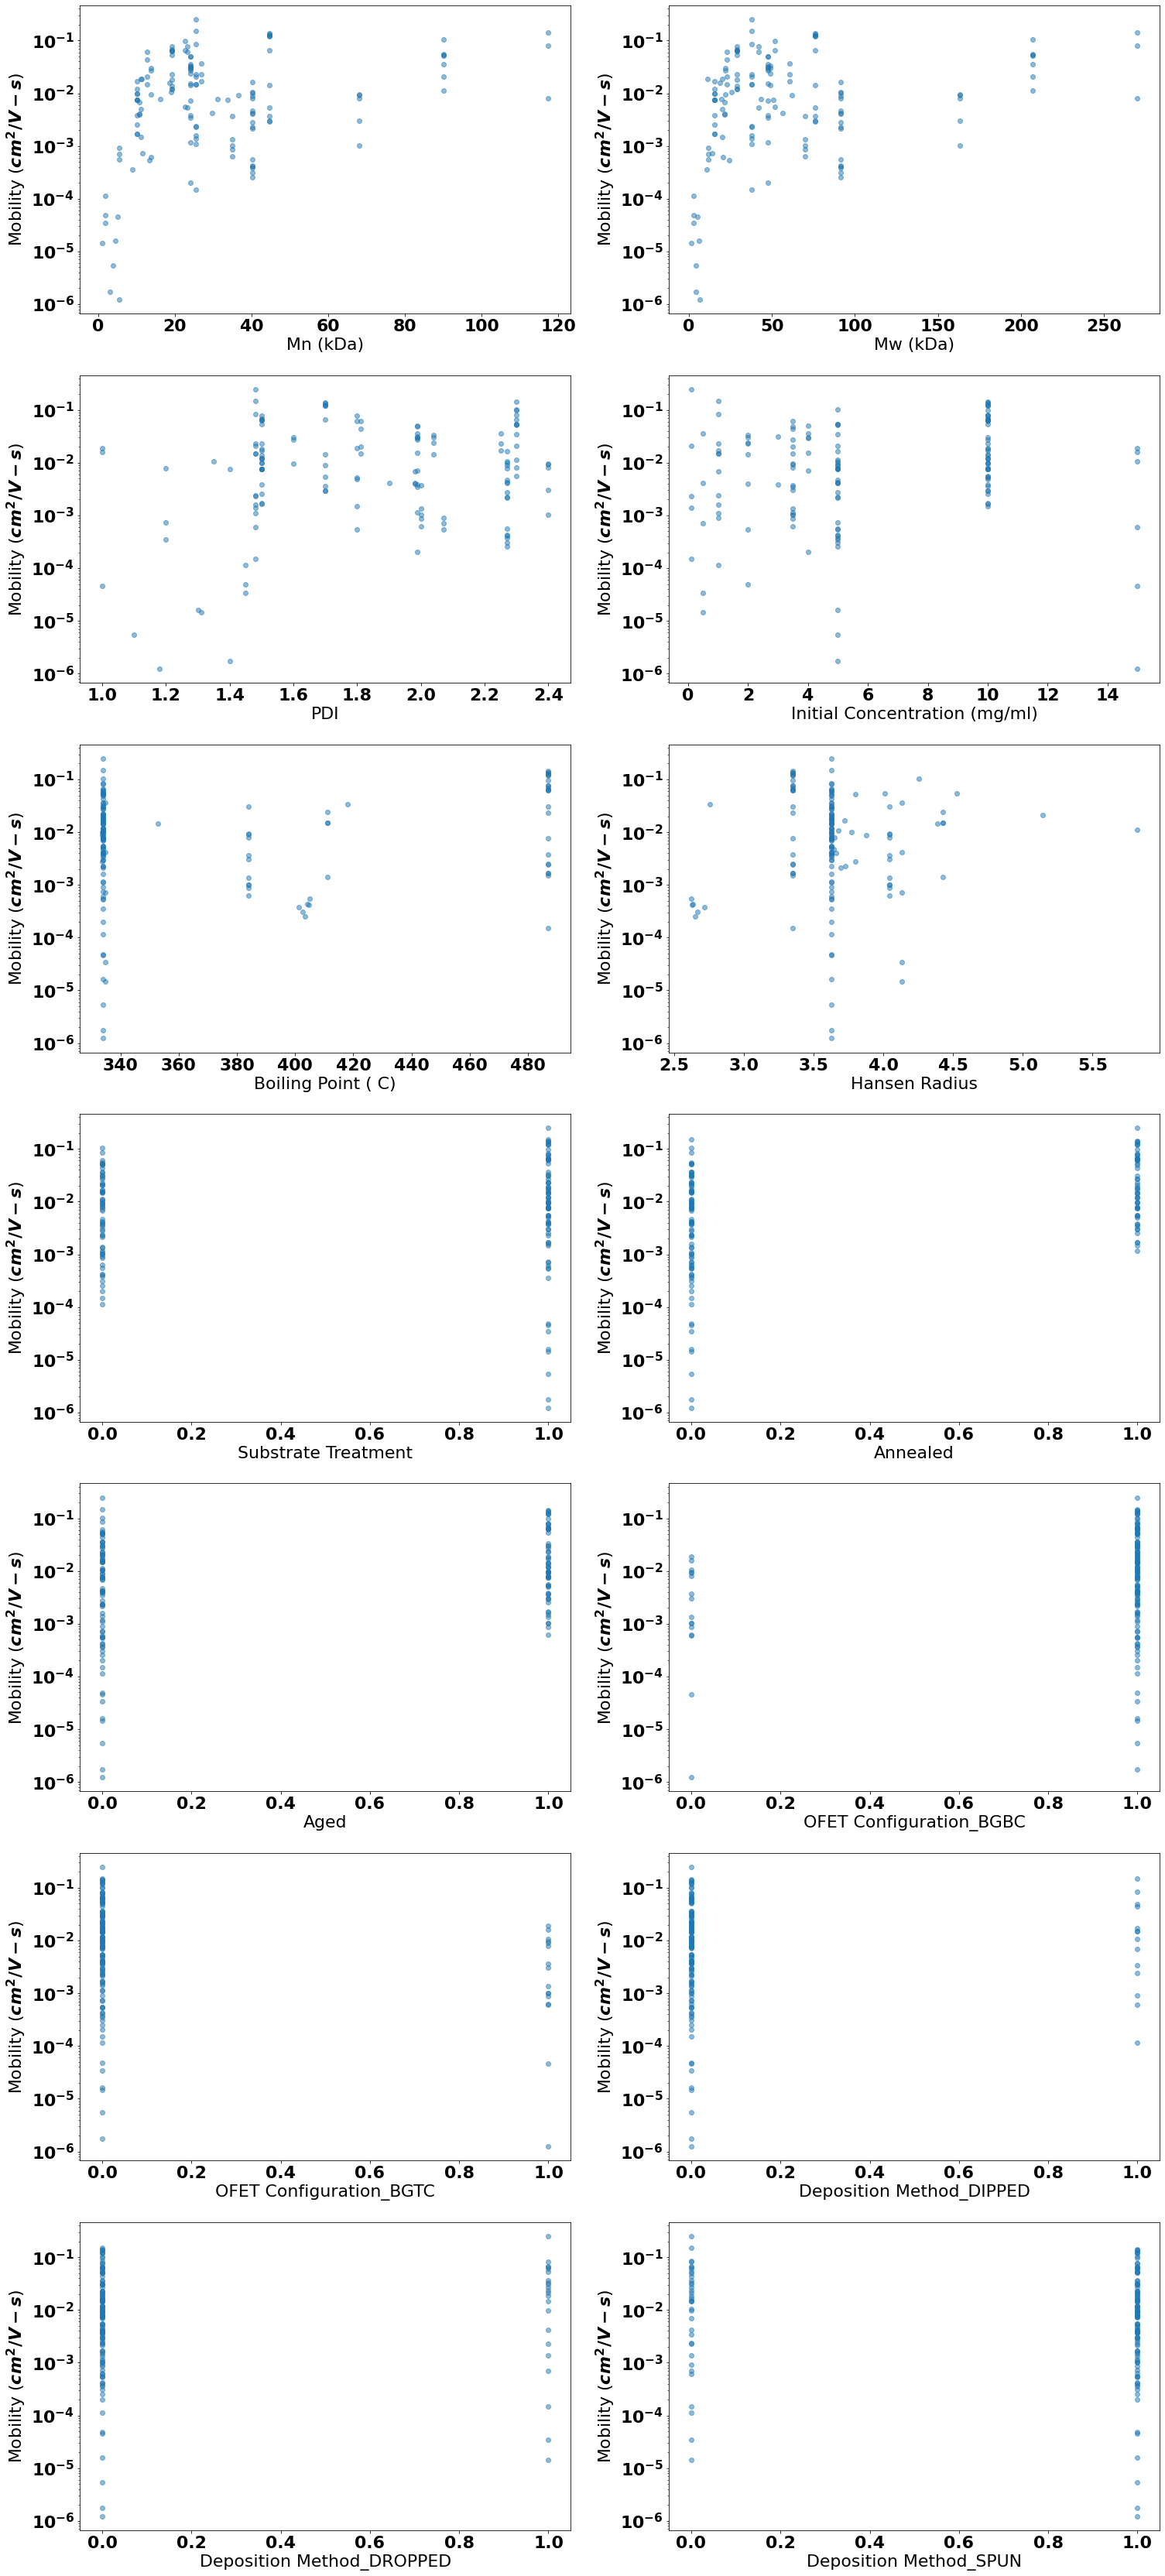

In [18]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

fig, ax = plt.subplots(7,2,figsize=(25,60))

ax = ax.ravel()

for var_i, varname in enumerate(varnames):
    
    ax[var_i].scatter(X[:,var_i], y, alpha=0.5)
    ax[var_i].set(
        xlabel=varname,
        ylabel='Mobility ($cm^2/V-s$)',
        yscale='log'    
    )

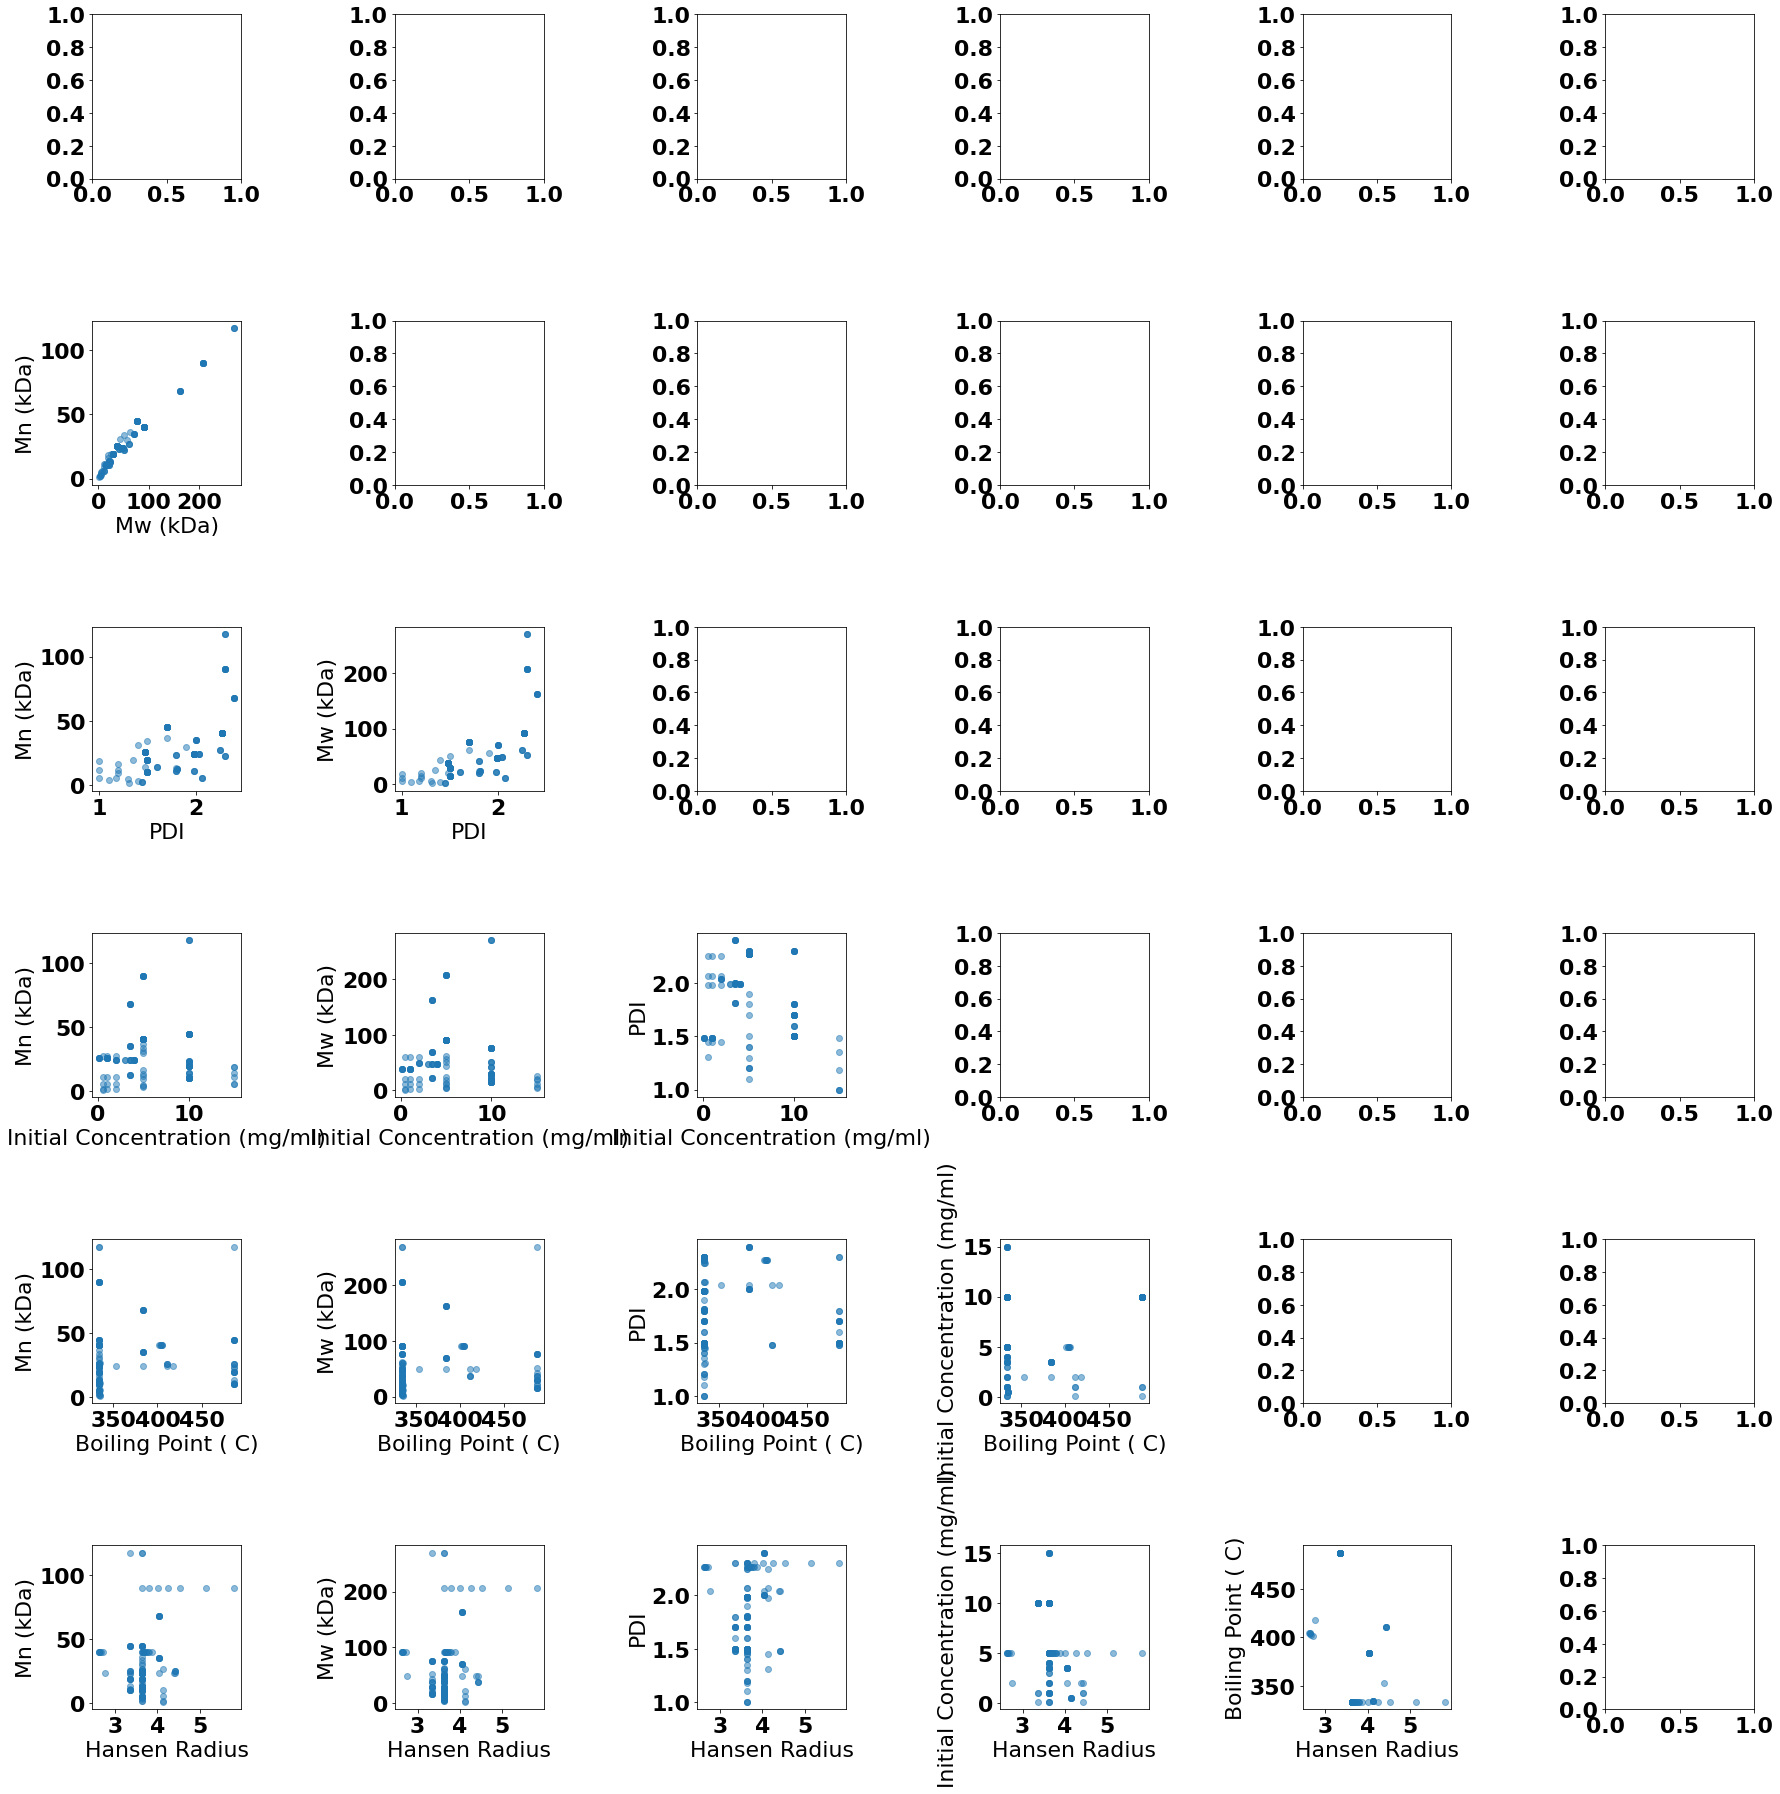

In [19]:
fig, ax = plt.subplots(6,6,figsize=(25,25))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

for var_i, varname_i in enumerate(varnames[:6]):
    for var_j, varname_j in enumerate(varnames[:6]):
        if var_i > var_j:
            ax[var_i][var_j].scatter(X[:,var_i], X[:,var_j], alpha=0.5)
            ax[var_i][var_j].set(
                                xlabel=varname_i,
                                ylabel=varname_j,
                    )
plt.tight_layout()

### Scaling and Correlated Feature Removal

In [20]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate input and output datasets
df_X = df.copy().drop(['Mobility (cm^2/V-s)'], axis=1)
y = df['Mobility (cm^2/V-s)'].values

# Perform dataset scaling; set standard scaler
scaler = StandardScaler()
df_Xsc = df_X.copy()
df_Xsc[:] = scaler.fit_transform(df_X)
df_Xsc

# Scale numpy arrays that will be used for analysis
Xsc = df_Xsc.values

# Perform log scaling on y, then fit a standard scaler on the result
ysc = np.log10(y)
ysc = scaler.fit_transform(ysc.reshape(-1,1))

print('Input dimensions: {} \nOutput dimensions: {}'.format(Xsc.shape,ysc.shape))

Input dimensions: (146, 14) 
Output dimensions: (146, 1)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


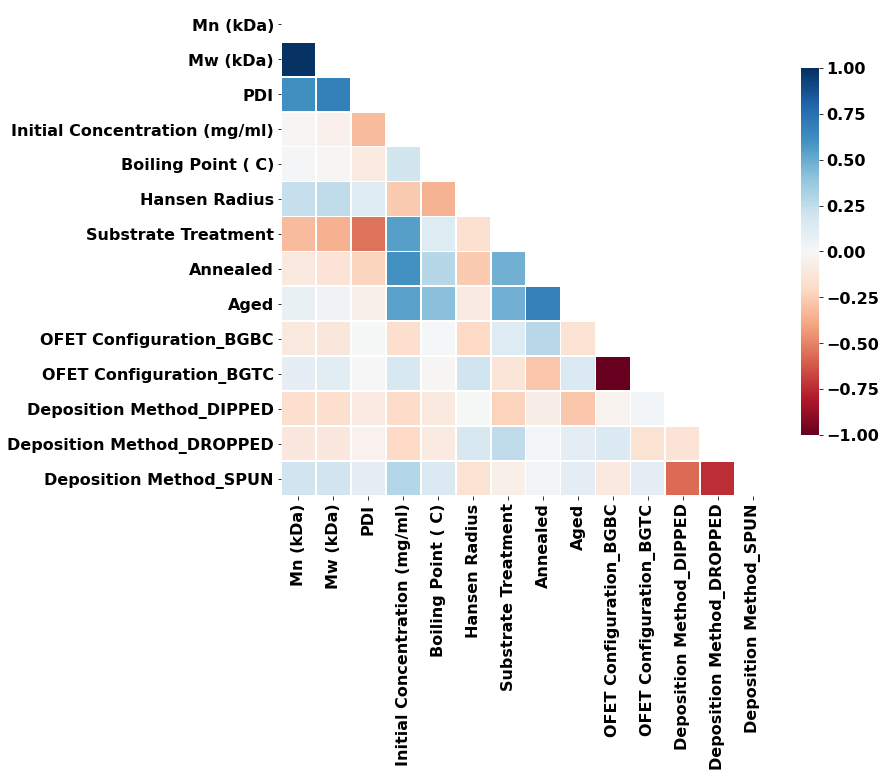

In [21]:
corr = df_Xsc.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Plot with seaborn
sns.heatmap(corr, 
            mask=mask, 
            cmap='RdBu', 
            vmax=1,
            vmin=-1,
            center=0,
            square=True, 
            linewidths=.8, 
            cbar_kws={"shrink": .75}
           );

We see that Mw and Mn are very correlated, and will remove one of these features. Finally, we will save the result of final cleaning:

In [22]:
df_cleaned = df.drop(['Mn (kDa)'], axis=1)
df_cleaned.shape

(146, 14)

#### Transfer result to .csv

In [23]:
# df_cleaned.to_csv('dataset-final-cleaned.csv', index=False)

## 3. Preliminary Surrogate Model Construction

In [24]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pyomo.environ import *

# read dataset located in data folder using pandas

fpath = 'data/dataset-final-cleaned.csv' #file path for data file

df = pd.read_csv(fpath) #pd.read_excel() or pd.read_csv() are file read options
df


,Mw (kDa),PDI,Initial Concentration (mg/ml),Boiling Point ( C),Hansen Radius,Substrate Treatment,Annealed,Mobility (cm^2/V-s),Aged,OFET Configuration_BGBC,OFET Configuration_BGTC,Deposition Method_DIPPED,Deposition Method_DROPPED,Deposition Method_SPUN
0,47.7,1.9875,4.0,334.0,3.629738,0,0,0.000202,0,1,0,0,0,1
1,47.7,1.9875,4.0,334.0,3.629738,0,0,0.007190,0,1,0,0,0,1
2,47.7,1.9875,4.0,334.0,3.629738,0,0,0.029400,0,1,0,0,0,1
3,47.7,1.9875,4.0,334.0,3.629738,0,0,0.050600,0,1,0,0,0,1
4,47.7,1.9875,4.0,334.0,3.629738,0,0,0.030600,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,163.2,2.4000,3.5,384.0,4.042153,0,0,0.001020,1,0,1,0,0,1
142,163.2,2.4000,3.5,384.0,4.042153,0,0,0.003050,1,0,1,0,0,1
143,163.2,2.4000,3.5,384.0,4.042153,0,0,0.008030,1,0,1,0,0,1
144,163.2,2.4000,3.5,384.0,4.042153,0,0,0.009530,1,0,1,0,0,1


Extract input and output arrays:

In [25]:
# Output
y = df['Mobility (cm^2/V-s)'].values

# Input
df_X = df.copy().drop(['Mobility (cm^2/V-s)'],axis=1)
X = df_X.values

# Variable names
varnames = df_X.columns

print('Dimensions of input matrix: {}'.format(X.shape))
print('Dimensions of output matrix: {}'.format(y.shape))
print(varnames)

Dimensions of input matrix: (146, 13)
Dimensions of output matrix: (146,)
Index(['Mw (kDa)', 'PDI', 'Initial Concentration (mg/ml)',
       'Boiling Point ( C)', 'Hansen Radius', 'Substrate Treatment',
       'Annealed', 'Aged', 'OFET Configuration_BGBC',
       'OFET Configuration_BGTC', 'Deposition Method_DIPPED',
       'Deposition Method_DROPPED', 'Deposition Method_SPUN'],
      dtype='object')


### Scaling
Same process as above, but redefined since we imported a new, cleaned dataset

In [26]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate input and output datasets
df_X = df.copy().drop(['Mobility (cm^2/V-s)'], axis=1)
y = df['Mobility (cm^2/V-s)'].values

# Perform dataset scaling; set standard scaler
scaler = StandardScaler()
df_Xsc = df_X.copy()
df_Xsc[:] = scaler.fit_transform(df_X)
df_Xsc

# Scale numpy arrays that will be used for analysis
Xsc = df_Xsc.values
for i in [5,6,7,8,9,10,11,12]:
    Xsc[:,i]=X[:,i]
    
# Perform log scaling on y, then fit a standard scaler on the result
ysc = np.log10(y)
ysc = scaler.fit_transform(ysc.reshape(-1,1))

print('Input dimensions: {} \nOutput dimensions: {}'.format(Xsc.shape,ysc.shape))

Input dimensions: (146, 13) 
Output dimensions: (146, 1)


In [27]:
#Values for Unscaling 

avg = np.mean(X, axis = 0)
sd = np.std(X, axis = 0)
ysc = np.log10(y)
avgy = np.mean(ysc)
sdy = np.std(ysc)

### Train test split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xsc, ysc.reshape(-1), test_size=0.20, random_state=15)

### I. Linear Regression


Surrogate constructed in pyomo:

In [29]:
from sklearn.metrics import mean_squared_error
from pyomo.environ import*
model = ConcreteModel()

##Define Data: 
model.n = np.arange(X_train.shape[1]) #dimension of x, 13 features
model.s_train = np.arange(X_train.shape[0]) #training samples
model.s_test = np.arange(X_test.shape[0]) #testing samples
model.params = np.arange(14)
model.y_train = y_train
model.x_train = X_train

##Define Variables
model.y_pred = Var(model.s_train, within = Reals)
model.a = Var(model.params, within = Reals)

#Define Constraint
def con_rule(model,i): #y_pred = a0 + a1*x1 + a2*x2
    return (model.a[0] + 
            model.a[1]*model.x_train[i,0] + 
            model.a[2]*model.x_train[i,1] +
            model.a[3]*model.x_train[i,2] +
            model.a[4]*model.x_train[i,3] +
            model.a[5]*model.x_train[i,4] +
            model.a[6]*model.x_train[i,5] +
            model.a[7]*model.x_train[i,6] +
            model.a[8]*model.x_train[i,7] +
            model.a[9]*model.x_train[i,8] +
            model.a[10]*model.x_train[i,9] +
            model.a[11]*model.x_train[i,10] +
            model.a[12]*model.x_train[i,11] +
            model.a[13]*model.x_train[i,12] - 
            model.y_pred[i] == 0)
model.con = Constraint(model.s_train, rule = con_rule)

#Define Objective
def obj_rule(model):
    return sum((model.y_pred[i] - model.y_train[i])**2 for i in model.s_train)/len(model.s_train)
model.obj = Objective(rule = obj_rule)

#Solve:
solver = SolverFactory('ipopt')
solver.solve(model)

#Store Fit Parameters
a = []
for i in model.a:
    a.append(model.a[i].value)
a = np.array(a)

def surr_LR(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13): #y_pred = a0 + a1*x1 + a2*x2 + ... a13*x13
    return (a[0] + a[1]*x1 + a[2]*x2 + a[3]*x3 + a[4]*x4 + a[5]*x5 + a[6]*x6 + a[7]*x7 + 
            a[8]*x8 + a[9]*x9 + a[10]*x10 + a[11]*x11 + a[12]*x12 + a[13]*x13)

y_pred_train = surr_LR(X_train[:,0], X_train[:,1], X_train[:,2], X_train[:,3], X_train[:,4], 
                       X_train[:,5], X_train[:,6], X_train[:,7], X_train[:,8], X_train[:,9], 
                       X_train[:,10], X_train[:,11], X_train[:,12])
y_pred_test = surr_LR(X_test[:,0], X_test[:,1], X_test[:,2], X_test[:,3], X_test[:,4], 
                      X_test[:,5], X_test[:,6], X_test[:,7], X_test[:,8], X_test[:,9], 
                      X_test[:,10], X_test[:,11], X_test[:,12])

mse_test = []
mse_test.append(mean_squared_error(y_test, y_pred_test))

print(mse_test)
model.pprint()

[0.7534245789240958]
3 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
    con_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  116 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115}
    y_pred_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  116 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


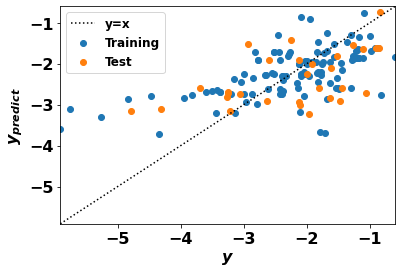

In [30]:
fig, ax = plt.subplots()

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

ax.scatter(y_train, y_pred_train)
ax.scatter(y_test,  y_pred_test)
ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k:')
ax.set(
    xlim=[min(y_train), max(y_train)],
    ylim=[min(y_train), max(y_train)],
    xlabel='$y$',
    ylabel='$y_{predict}$'
)
ax.legend(['y=x', 'Training', 'Test'])


#### Fitting All Data: 

In [31]:
model = ConcreteModel()

##Define Data: 
model.n = np.arange(Xsc.shape[1]) #dimension of x, 13 features
model.s = np.arange(Xsc.shape[0]) 
model.params = np.arange(14)
model.y = ysc.reshape(-1)
model.x = Xsc

##Define Variables
model.y_pred = Var(model.s, within = Reals)
model.a = Var(model.params, within = Reals)

#Define Constraint
def con_rule(model,i): #y_pred = a0 + a1*x1 + a2*x2
    return (model.a[0] + 
            model.a[1]*model.x[i,0] + 
            model.a[2]*model.x[i,1] +
            model.a[3]*model.x[i,2] +
            model.a[4]*model.x[i,3] +
            model.a[5]*model.x[i,4] +
            model.a[6]*model.x[i,5] +
            model.a[7]*model.x[i,6] +
            model.a[8]*model.x[i,7] +
            model.a[9]*model.x[i,8] +
            model.a[10]*model.x[i,9] +
            model.a[11]*model.x[i,10] +
            model.a[12]*model.x[i,11] +
            model.a[13]*model.x[i,12] - 
            model.y_pred[i] == 0)
model.con = Constraint(model.s, rule = con_rule)

#Define Objective
def obj_rule(model):
    return sum((model.y_pred[i] - model.y[i])**2 for i in model.s)/len(model.s) 
model.obj = Objective(rule = obj_rule)


solver = SolverFactory('ipopt')
solver.solve(model)
    
a = []
for i in model.a:
    a.append(model.a[i].value)
a = np.array(a)


def surr_LR(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13): #y_pred = a0 + a1*x1 + a2*x2 + ... a13*x13
    return (a[0] + a[1]*x1 + a[2]*x2 + a[3]*x3 + a[4]*x4 + a[5]*x5 + a[6]*x6 + a[7]*x7 + 
            a[8]*x8 + a[9]*x9 + a[10]*x10 + a[11]*x11 + a[12]*x12 + a[13]*x13)

y_pred= surr_LR(Xsc[:,0], Xsc[:,1], Xsc[:,2], Xsc[:,3], Xsc[:,4], 
                Xsc[:,5], Xsc[:,6], Xsc[:,7], Xsc[:,8], Xsc[:,9], 
                Xsc[:,10], Xsc[:,11], Xsc[:,12])



mse_test = (mean_squared_error(ysc, y_pred))

print(mse_test)
model.pprint()

0.637705097442403
3 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
    con_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  146 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145}
    y_pred_index : Size=1

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


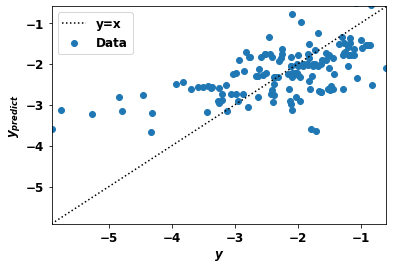

In [32]:
fig, ax = plt.subplots()

ax.scatter(ysc, y_pred)
ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k:')
ax.set(
    xlim=[min(y_train), max(y_train)],
    ylim=[min(y_train), max(y_train)],
    xlabel='$y$',
    ylabel='$y_{predict}$'
)
ax.legend(['y=x', 'Data'])

#### Optimization: 

In [33]:
model = ConcreteModel()

model.cont = np.arange(5)
model.bin = np.arange(8)
model.xcont = Var(model.cont, within = Reals)
model.xbin = Var(model.bin, within = Binary)

model.obj = Objective(expr = a[0] + a[1]*model.xcont[0] + a[2]*model.xcont[1] + a[3]*model.xcont[2]
                      + a[4]*model.xcont[3]+ a[5]*model.xcont[4] + a[6]*model.xbin[0] + a[7]*model.xbin[1]
                      + a[8]*model.xbin[2] + a[9]*model.xbin[3] + a[10]*model.xbin[4] + a[11]*model.xbin[5] 
                      + a[12]*model.xbin[6] + a[13]*model.xbin[7],sense = maximize)

#Constraints on the non-scaled x values 
model.con1 = Constraint(expr = model.xcont[0]*sd[0]+avg[0] >= 1) #Mw >= 1 
model.con2 = Constraint(expr = model.xcont[0]*sd[0]+avg[0] <= 120) #Mw <= 120
model.con3 = Constraint(expr = model.xcont[1]*sd[1]+avg[1] >= 1) #PDI >= 1
model.con4 = Constraint(expr = model.xcont[1]*sd[1]+avg[1] <= 2.5) #PDI <= 2.5
model.con5 = Constraint(expr = model.xcont[2]*sd[2]+avg[2] >= 0) #Concentration >= 0
model.con6 = Constraint(expr = model.xcont[2]*sd[2]+avg[2] <= 10) #Concentration <= 10
model.con7 = Constraint(expr = model.xcont[3]*sd[3]+avg[3] >= 334) #Boiling Point >= 334 
model.con8 = Constraint(expr = model.xcont[3]*sd[3]+avg[3] <= 487) #Boiling Point <= 487
model.con9 = Constraint(expr = model.xcont[4]*sd[4]+avg[4] >= 2) #Hansen Radius >= 2
model.con10 = Constraint(expr = model.xcont[4]*sd[4]+avg[4] <= 6) #Hansen Radius <=6
model.con11 = Constraint(expr = model.xbin[3]+model.xbin[4] == 1) #Configuration = 1 
model.con12 = Constraint(expr = model.xbin[5]+model.xbin[6]+model.xbin[7] ==1) #Deposition = 1


solver = SolverFactory('baron')
solver.solve(model)

model.pprint()

2 Set Declarations
    xbin_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    8 : {0, 1, 2, 3, 4, 5, 6, 7}
    xcont_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

2 Var Declarations
    xbin : Size=8, Index=xbin_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
    xcont : Size=5, Index=xcont_index
        Key : Lower : 

In [34]:
#Optimization Results 

X = np.zeros((5,1))
for i in range(5):
    X[i] = value(model.xcont[i])*sd[i]+avg[i] 

Obj = value(model.obj)*sdy+avgy
Obj = 10**Obj

print("Maximim Mobility:",Obj)
print("Optimal MW:", X[0])
print("Optimal PDI:", X[1])
print("Optimal Initial Concentration:", X[2])
print("Optimal Boiling Point:", X[3])
print("Optimal Hansen Radius:", X[4])
print("Substrate Treatment:", value(model.xbin[0]))
print("Annealed:", value(model.xbin[1]))
print("Aged:", value(model.xbin[2]))
print("OFET Configuration_BGBC:", value(model.xbin[3]))
print("OFET Configuration_BGTC:", value(model.xbin[4]))
print("Deposition Method_DIPPED:", value(model.xbin[5]))
print("Deposition Method_DROPPED", value(model.xbin[6]))
print("Deposition Method_SPUN:", value(model.xbin[7]))

Maximim Mobility: 0.028979265081171296
Optimal MW: [120.]
Optimal PDI: [2.5]
Optimal Initial Concentration: [10.]
Optimal Boiling Point: [487.]
Optimal Hansen Radius: [6.]
Substrate Treatment: 0.0
Annealed: 1.0
Aged: 1.0
OFET Configuration_BGBC: 1.0
OFET Configuration_BGTC: 0.0
Deposition Method_DIPPED: 1.0
Deposition Method_DROPPED 0.0
Deposition Method_SPUN: 0.0


### II. LASSO (linear)

Surrogate constructed in pyomo:

##### Hyper-Parameter Tuning:

In [35]:
#set up range of hyperparameters
exponents = np.linspace(-5,5, num = 11)
alpha = 10**exponents
print(alpha)

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]


In [36]:
from pyomo.environ import* 
from sklearn.metrics import mean_squared_error  

mse_test = []

for j in range(len(alpha)):

    model = ConcreteModel()

    ##Define Data: 
    model.n = np.arange(X_train.shape[1]) #dimension of x, 13 features
    model.s_train = np.arange(X_train.shape[0]) #training samples
    model.s_test = np.arange(X_test.shape[0]) #testing samples
    model.params = np.arange(14)
    model.y_train = y_train.reshape(-1)
    model.x_train = X_train

    ##Define Variables
    model.y_pred = Var(model.s_train, within = Reals)
    model.a = Var(model.params, within = Reals)

    #Define Constraint
    def con_rule(model,i): #y_pred = a0 + a1*x1 + a2*x2
        return (model.a[0] + 
                model.a[1]*model.x_train[i,0] + 
                model.a[2]*model.x_train[i,1] +
                model.a[3]*model.x_train[i,2] +
                model.a[4]*model.x_train[i,3] +
                model.a[5]*model.x_train[i,4] +
                model.a[6]*model.x_train[i,5] +
                model.a[7]*model.x_train[i,6] +
                model.a[8]*model.x_train[i,7] +
                model.a[9]*model.x_train[i,8] +
                model.a[10]*model.x_train[i,9] +
                model.a[11]*model.x_train[i,10] +
                model.a[12]*model.x_train[i,11] +
                model.a[13]*model.x_train[i,12] - 
                model.y_pred[i] == 0)
    model.con = Constraint(model.s_train, rule = con_rule)

    #Define Objective
    def obj_rule(model):
        norm_L1 =  norm_L1 = alpha[j]*sum(abs(model.a[i]) for i in model.a)
        return sum((model.y_pred[i] - model.y_train[i])**2 for i in model.s_train)/len(model.s_train) + norm_L1
    model.obj = Objective(rule = obj_rule)


    solver = SolverFactory('baron')
    solver.solve(model)

    a = []
    for i in model.a:
        a.append(model.a[i].value)
    a = np.array(a)


    def surr_LR(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13): #y_pred = a0 + a1*x1 + a2*x2 + ... a13*x13
        return (a[0] + a[1]*x1 + a[2]*x2 + a[3]*x3 + a[4]*x4 + a[5]*x5 + a[6]*x6 + a[7]*x7 + 
                a[8]*x8 + a[9]*x9 + a[10]*x10 + a[11]*x11 + a[12]*x12 + a[13]*x13)

    y_pred_train = surr_LR(X_train[:,0], X_train[:,1], X_train[:,2], X_train[:,3], X_train[:,4], 
                           X_train[:,5], X_train[:,6], X_train[:,7], X_train[:,8], X_train[:,9], 
                           X_train[:,10], X_train[:,11], X_train[:,12])
    y_pred_test = surr_LR(X_test[:,0], X_test[:,1], X_test[:,2], X_test[:,3], X_test[:,4], 
                          X_test[:,5], X_test[:,6], X_test[:,7], X_test[:,8], X_test[:,9], 
                          X_test[:,10], X_test[:,11], X_test[:,12])


    mse_test.append(mean_squared_error(y_test, y_pred_test))

print(mse_test)

[0.7533384903454248, 0.7532503444590557, 0.7527375059155388, 0.7472359271514439, 0.7590785505778957, 1.2919426977007442, 6.023551717458807, 6.023551717458807, 6.023551717458807, 6.023551717458807, 6.023551717458807]


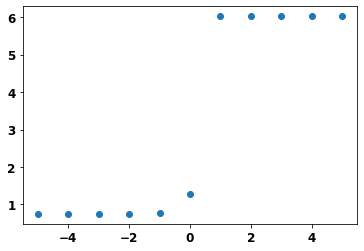

In [37]:
plt.scatter(exponents,mse_test) #choose alpha = 0.01

#### Train-Test: 

In [38]:
model = ConcreteModel()

##Define Data: 
model.n = np.arange(X_train.shape[1]) #dimension of x, 13 features
model.s_train = np.arange(X_train.shape[0]) #training samples
model.s_test = np.arange(X_test.shape[0]) #testing samples
model.params = np.arange(14)
model.y_train = y_train.reshape(-1)
model.x_train = X_train

##Define Variables
model.y_pred = Var(model.s_train, within = Reals)
model.a = Var(model.params, within = Reals)

#Define Constraint
def con_rule(model,i): #y_pred = a0 + a1*x1 + a2*x2
    return (model.a[0] + 
            model.a[1]*model.x_train[i,0] + 
            model.a[2]*model.x_train[i,1] +
            model.a[3]*model.x_train[i,2] +
            model.a[4]*model.x_train[i,3] +
            model.a[5]*model.x_train[i,4] +
            model.a[6]*model.x_train[i,5] +
            model.a[7]*model.x_train[i,6] +
            model.a[8]*model.x_train[i,7] +
            model.a[9]*model.x_train[i,8] +
            model.a[10]*model.x_train[i,9] +
            model.a[11]*model.x_train[i,10] +
            model.a[12]*model.x_train[i,11] +
            model.a[13]*model.x_train[i,12] - 
            model.y_pred[i] == 0)
model.con = Constraint(model.s_train, rule = con_rule)
   
#Define Objective
def obj_rule(model):
    norm_L1 =  norm_L1 = 0.01*sum(abs(model.a[i]) for i in model.a)
    return sum((model.y_pred[i] - model.y_train[i])**2 for i in model.s_train)/len(model.s_train) + norm_L1
model.obj = Objective(rule = obj_rule)


solver = SolverFactory('baron')
solver.solve(model)

a = []
for i in model.a:
    a.append(model.a[i].value)
a = np.array(a)


def surr_LR(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13): #y_pred = a0 + a1*x1 + a2*x2 + ... a13*x13
    return (a[0] + a[1]*x1 + a[2]*x2 + a[3]*x3 + a[4]*x4 + a[5]*x5 + a[6]*x6 + a[7]*x7 + 
            a[8]*x8 + a[9]*x9 + a[10]*x10 + a[11]*x11 + a[12]*x12 + a[13]*x13)

y_pred_train = surr_LR(X_train[:,0], X_train[:,1], X_train[:,2], X_train[:,3], X_train[:,4], 
                        X_train[:,5], X_train[:,6], X_train[:,7], X_train[:,8], X_train[:,9], 
                        X_train[:,10], X_train[:,11], X_train[:,12])
y_pred_test = surr_LR(X_test[:,0], X_test[:,1], X_test[:,2], X_test[:,3], X_test[:,4], 
                        X_test[:,5], X_test[:,6], X_test[:,7], X_test[:,8], X_test[:,9], 
                        X_test[:,10], X_test[:,11], X_test[:,12])


mse_test = mean_squared_error(y_test, y_pred_test)

print(mse_test)
model.pprint()

0.7472359271514439
3 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
    con_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  116 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115}
    y_pred_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  116 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

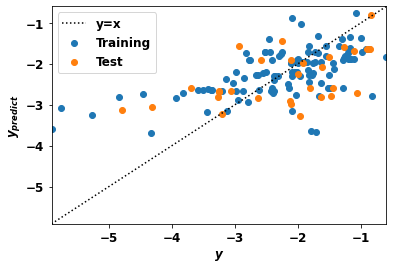

In [39]:
fig, ax = plt.subplots()

ax.scatter(y_train, y_pred_train)
ax.scatter(y_test,  y_pred_test)
ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k:')
ax.set(
    xlim=[min(y_train), max(y_train)],
    ylim=[min(y_train), max(y_train)],
    xlabel='$y$',
    ylabel='$y_{predict}$'
)
ax.legend(['y=x', 'Training', 'Test'])

#### All Data:

In [40]:
model = ConcreteModel()

##Define Data: 
model.n = np.arange(Xsc.shape[1]) #dimension of x, 13 features
model.s = np.arange(Xsc.shape[0]) 
model.params = np.arange(14)
model.y = ysc.reshape(-1)
model.x = Xsc

##Define Variables
model.y_pred = Var(model.s, within = Reals)
model.a = Var(model.params, within = Reals)

#Define Constraint
def con_rule(model,i): #y_pred = a0 + a1*x1 + a2*x2
    return (model.a[0] + 
            model.a[1]*model.x[i,0] + 
            model.a[2]*model.x[i,1] +
            model.a[3]*model.x[i,2] +
            model.a[4]*model.x[i,3] +
            model.a[5]*model.x[i,4] +
            model.a[6]*model.x[i,5] +
            model.a[7]*model.x[i,6] +
            model.a[8]*model.x[i,7] +
            model.a[9]*model.x[i,8] +
            model.a[10]*model.x[i,9] +
            model.a[11]*model.x[i,10] +
            model.a[12]*model.x[i,11] +
            model.a[13]*model.x[i,12] - 
            model.y_pred[i] == 0)
model.con = Constraint(model.s, rule = con_rule)

#Define Objective
def obj_rule(model):
    norm_L1 =  norm_L1 = 0.01*sum(abs(model.a[i]) for i in model.a)
    return sum((model.y_pred[i] - model.y[i])**2 for i in model.s)/len(model.s) + norm_L1
model.obj = Objective(rule = obj_rule)


solver = SolverFactory('baron')
solver.solve(model)
    
a = []
for i in model.a:
    a.append(model.a[i].value)
a = np.array(a)


def surr_LR(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13): #y_pred = a0 + a1*x1 + a2*x2 + ... a13*x13
    return (a[0] + a[1]*x1 + a[2]*x2 + a[3]*x3 + a[4]*x4 + a[5]*x5 + a[6]*x6 + a[7]*x7 + 
            a[8]*x8 + a[9]*x9 + a[10]*x10 + a[11]*x11 + a[12]*x12 + a[13]*x13)

y_pred= surr_LR(Xsc[:,0], Xsc[:,1], Xsc[:,2], Xsc[:,3], Xsc[:,4], 
                Xsc[:,5], Xsc[:,6], Xsc[:,7], Xsc[:,8], Xsc[:,9], 
                Xsc[:,10], Xsc[:,11], Xsc[:,12])



mse_test = (mean_squared_error(ysc, y_pred))

print(mse_test)
model.pprint()

0.639498612836198
3 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
    con_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  146 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145}
    y_pred_index : Size=1

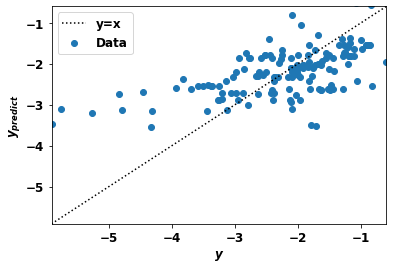

In [41]:
fig, ax = plt.subplots()

ax.scatter(ysc, y_pred)
ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k:')
ax.set(
    xlim=[min(y_train), max(y_train)],
    ylim=[min(y_train), max(y_train)],
    xlabel='$y$',
    ylabel='$y_{predict}$'
)
ax.legend(['y=x', 'Data'])

#### Optimization

In [42]:
model = ConcreteModel()

model.cont = np.arange(5)
model.bin = np.arange(8)
model.xcont = Var(model.cont, within = Reals)
model.xbin = Var(model.bin, within = Binary)

model.obj = Objective(expr = a[0] + a[1]*model.xcont[0] + a[2]*model.xcont[1] + a[3]*model.xcont[2]
                      + a[4]*model.xcont[3]+ a[5]*model.xcont[4] + a[6]*model.xbin[0] + a[7]*model.xbin[1]
                      + a[8]*model.xbin[2] + a[9]*model.xbin[3] + a[10]*model.xbin[4] + a[11]*model.xbin[5] 
                      + a[12]*model.xbin[6] + a[13]*model.xbin[7],sense = maximize)

#Constraints on the non-scaled x values 
model.con1 = Constraint(expr = model.xcont[0]*sd[0]+avg[0] >= 1) #Mw >= 1 
model.con2 = Constraint(expr = model.xcont[0]*sd[0]+avg[0] <= 120) #Mw <= 120
model.con3 = Constraint(expr = model.xcont[1]*sd[1]+avg[1] >= 1) #PDI >= 1
model.con4 = Constraint(expr = model.xcont[1]*sd[1]+avg[1] <= 2.5) #PDI <= 2.5
model.con5 = Constraint(expr = model.xcont[2]*sd[2]+avg[2] >= 0) #Concentration >= 0
model.con6 = Constraint(expr = model.xcont[2]*sd[2]+avg[2] <= 10) #Concentration <= 10
model.con7 = Constraint(expr = model.xcont[3]*sd[3]+avg[3] >= 334) #Boiling Point >= 334 
model.con8 = Constraint(expr = model.xcont[3]*sd[3]+avg[3] <= 487) #Boiling Point <= 487
model.con9 = Constraint(expr = model.xcont[4]*sd[4]+avg[4] >= 2) #Hansen Radius >= 2
model.con10 = Constraint(expr = model.xcont[4]*sd[4]+avg[4] <= 6) #Hansen Radius <=6
model.con11 = Constraint(expr = model.xbin[3]+model.xbin[4] == 1) #Configuration = 1 
model.con12 = Constraint(expr = model.xbin[5]+model.xbin[6]+model.xbin[7] ==1) #Deposition = 1


solver = SolverFactory('baron')
solver.solve(model)

model.pprint()

2 Set Declarations
    xbin_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    8 : {0, 1, 2, 3, 4, 5, 6, 7}
    xcont_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

2 Var Declarations
    xbin : Size=8, Index=xbin_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
    xcont : Size=5, Index=xcont_index
        Key : Lower : 

In [43]:
#Optimization Results 

X = np.zeros((5,1))
for i in range(5):
    X[i] = value(model.xcont[i])*sd[i]+avg[i] 

Obj = value(model.obj)*sdy+avgy
Obj = 10**Obj

print("Maximum Mobility:",Obj)
print("Optimal MW:", X[0])
print("Optimal PDI:", X[1])
print("Optimal Initial Concentration:", X[2])
print("Optimal Boiling Point:", X[3])
print("Optimal Hansen Radius:", X[4])
print("Substrate Treatment:", value(model.xbin[0]))
print("Annealed:", value(model.xbin[1]))
print("Aged:", value(model.xbin[2]))
print("OFET Configuration_BGBC:", value(model.xbin[3]))
print("OFET Configuration_BGTC:", value(model.xbin[4]))
print("Deposition Method_DIPPED:", value(model.xbin[5]))
print("Deposition Method_DROPPED", value(model.xbin[6]))
print("Deposition Method_SPUN:", value(model.xbin[7]))

Maximum Mobility: 0.017410643058434046
Optimal MW: [120.]
Optimal PDI: [2.5]
Optimal Initial Concentration: [10.]
Optimal Boiling Point: [487.]
Optimal Hansen Radius: [6.]
Substrate Treatment: 0.0
Annealed: 1.0
Aged: 1.0
OFET Configuration_BGBC: 1.0
OFET Configuration_BGTC: 0.0
Deposition Method_DIPPED: 1.0
Deposition Method_DROPPED 0.0
Deposition Method_SPUN: 0.0


### 3 LASSO with quadratic terms

#### Hyperparameter Tuning: 

In [44]:
mse_test = []

for j in range(len(alpha)):
    model = ConcreteModel()

    ##Define Data: 
    model.n = np.arange(X_train.shape[1]) #dimension of x, 13 features
    model.s_train = np.arange(X_train.shape[0]) #training samples
    model.s_test = np.arange(X_test.shape[0]) #testing samples
    model.linear_params = np.arange(13)
    model.quad_params = np.arange(5)
    model.y_train = y_train
    model.x_train = X_train

    ##Define Variables
    model.y_pred = Var(model.s_train, within = Reals)
    model.b = Var(within = Reals)
    model.a_lin = Var(model.linear_params, within = Reals)
    model.a_quad = Var(model.quad_params, within = Reals)



    def con_rule(model,i): #y_pred = a0 + a1*x1 + a2*x2 ...
        lin_terms = sum((model.a_lin[j]*model.x_train[i,j]) for j in model.linear_params)
        quad_terms = sum((model.a_quad[j]*model.x_train[i,j]**2) for j in model.quad_params)
        return model.b + lin_terms + quad_terms - model.y_pred[i] == 0

    model.con = Constraint(model.s_train, rule = con_rule)

    #Define Objective
    def obj_rule(model):
        norm_L1 = alpha[j]*(sum(abs(model.a_lin[i]) for i in model.a_lin)+sum(abs(model.a_quad[i]) for i in model.a_quad))
        return norm_L1 + sum((model.y_pred[i] - model.y_train[i])**2 for i in model.s_train)/len(model.s_train)
    model.obj = Objective(rule = obj_rule)

    #Solve:
    solver = SolverFactory('baron')
    solver.solve(model)

    #Store Fit Parameters
    a_lin = []
    for i in model.a_lin:
        a_lin.append(model.a_lin[i].value)
    a_lin = np.array(a_lin)

    a_quad = []
    for i in model.a_quad:
        a_quad.append(model.a_quad[i].value)
    a_quad = np.array(a_quad)

    b = model.b.value

    def surr_LR(X): #y_pred = a0 + a1*x1 + a2*x2 + ... a13*x13
        return (b + a_lin[0]*X[:,0] + a_lin[1]*X[:,1] + a_lin[2]*X[:,2] + a_lin[3]*X[:,3] + 
                a_lin[4]*X[:,4] + a_lin[5]*X[:,5] + a_lin[6]*X[:,6] + a_lin[7]*X[:,7] + 
                a_lin[8]*X[:,8] + a_lin[9]*X[:,9] + a_lin[10]*X[:,10] + a_lin[11]*X[:,11] + a_lin[12]*X[:,12] +
                a_quad[0]*X[:,0]**2 + a_quad[1]*X[:,1]**2 + a_quad[2]*X[:,2]**2 + a_quad[3]*X[:,3]**2 + a_quad[4]*X[:,4]**2)



    y_pred_train = surr_LR(X_train)
    y_pred_test = surr_LR(X_test)

    mse_test.append(mean_squared_error(y_test, y_pred_test))  

[0.6231052608727631, 0.6229620100828205, 0.6218704560997528, 0.6131148672593834, 0.6839723371347809, 1.0214830345819534, 1.0214627622607793, 1.0214589533500285, 1.0214907170315437, 1.0214735470493885, 1.0214611836891152]


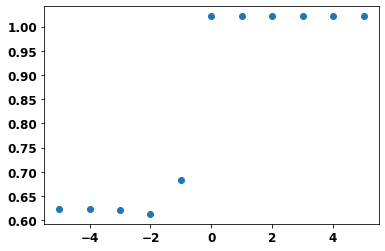

In [45]:
print(mse_test)
plt.scatter(exponents,mse_test)
#choose alpha = 0.01

In [46]:
from sklearn.metrics import mean_squared_error
from pyomo.environ import*
model = ConcreteModel()

##Define Data: 
model.n = np.arange(X_train.shape[1]) #dimension of x, 13 features
model.s_train = np.arange(X_train.shape[0]) #training samples
model.s_test = np.arange(X_test.shape[0]) #testing samples
model.linear_params = np.arange(13)
model.quad_params = np.arange(5)
model.y_train = y_train
model.x_train = X_train

##Define Variables
model.y_pred = Var(model.s_train, within = Reals)
model.b = Var(within = Reals)
model.a_lin = Var(model.linear_params, within = Reals)
model.a_quad = Var(model.quad_params, within = Reals)



def con_rule(model,i): #y_pred = a0 + a1*x1 + a2*x2 ...
    lin_terms = sum((model.a_lin[j]*model.x_train[i,j]) for j in model.linear_params)
    quad_terms = sum((model.a_quad[j]*model.x_train[i,j]**2) for j in model.quad_params)
    return model.b + lin_terms + quad_terms - model.y_pred[i] == 0

model.con = Constraint(model.s_train, rule = con_rule)

#Define Objective
def obj_rule(model):
    alpha = 0.01 #hyperparameter
    norm_L1 = alpha*(sum(abs(model.a_lin[i]) for i in model.a_lin)+sum(abs(model.a_quad[i]) for i in model.a_quad))
    return norm_L1 + sum((model.y_pred[i] - model.y_train[i])**2 for i in model.s_train)/len(model.s_train)
model.obj = Objective(rule = obj_rule)

#Solve:
solver = SolverFactory('baron')
solver.solve(model)

#Store Fit Parameters
a_lin = []
for i in model.a_lin:
    a_lin.append(model.a_lin[i].value)
a_lin = np.array(a_lin)

a_quad = []
for i in model.a_quad:
    a_quad.append(model.a_quad[i].value)
a_quad = np.array(a_quad)

b = model.b.value

def surr_LR(X): #y_pred = a0 + a1*x1 + a2*x2 + ... a13*x13
    return (b + a_lin[0]*X[:,0] + a_lin[1]*X[:,1] + a_lin[2]*X[:,2] + a_lin[3]*X[:,3] + 
            a_lin[4]*X[:,4] + a_lin[5]*X[:,5] + a_lin[6]*X[:,6] + a_lin[7]*X[:,7] + 
            a_lin[8]*X[:,8] + a_lin[9]*X[:,9] + a_lin[10]*X[:,10] + a_lin[11]*X[:,11] + a_lin[12]*X[:,12] +
            a_quad[0]*X[:,0]**2 + a_quad[1]*X[:,1]**2 + a_quad[2]*X[:,2]**2 + a_quad[3]*X[:,3]**2 + a_quad[4]*X[:,4]**2)



y_pred_train = surr_LR(X_train)
y_pred_test = surr_LR(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)

# print(mse_test)
print(mse_test)
model.pprint()

0.6131148672593834
4 Set Declarations
    a_lin_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   13 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
    a_quad_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    con_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  116 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115}
    y_pred_index : 

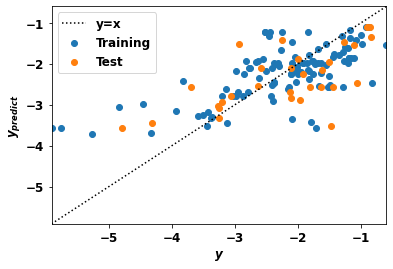

In [47]:
fig, ax = plt.subplots()

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

ax.scatter(y_train, y_pred_train)
ax.scatter(y_test,  y_pred_test)
ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k:')
ax.set(
    xlim=[min(y_train), max(y_train)],
    ylim=[min(y_train), max(y_train)],
    xlabel='$y$',
    ylabel='$y_{predict}$'
)
ax.legend(['y=x', 'Training', 'Test'])


Surrogate Optimum Prediction:

In [48]:
model = ConcreteModel()

##Define Variables
model.cont = np.arange(5)
model.bin = np.arange(8)
model.xcont = Var(model.cont, within = Reals)
model.xbin = Var(model.bin, within = Binary)

#Define Objective
model.obj = Objective(expr = b + a_lin[0]*model.xcont[0] + a_lin[1]*model.xcont[1] + a_lin[2]*model.xcont[2]
                      + a_lin[3]*model.xcont[3]+ a_lin[4]*model.xcont[4] + a_lin[5]*model.xbin[0] 
                      + a_lin[6]*model.xbin[1]+ a_lin[7]*model.xbin[2] + a_lin[8]*model.xbin[3]
                      + a_lin[9]*model.xbin[4] + a_lin[10]*model.xbin[5] + a_lin[11]*model.xbin[6]
                      + a_lin[12]*model.xbin[7] + a_quad[0]*model.xcont[0]**2 + a_quad[1]*model.xcont[1]**2
                      + a_quad[2]*model.xcont[2]**2 + a_quad[3]*model.xcont[3]**2 + a_quad[4]*model.xcont[4]**2
                      ,sense = maximize)

#Constraints on the non-scaled x values 
model.con1 = Constraint(expr = model.xcont[0]*sd[0]+avg[0] >= 1) #Mw >= 1 
model.con2 = Constraint(expr = model.xcont[0]*sd[0]+avg[0] <= 120) #Mw <= 120
model.con3 = Constraint(expr = model.xcont[1]*sd[1]+avg[1] >= 1) #PDI >= 1
model.con4 = Constraint(expr = model.xcont[1]*sd[1]+avg[1] <= 2.5) #PDI <= 2.5
model.con5 = Constraint(expr = model.xcont[2]*sd[2]+avg[2] >= 0) #Concentration >= 0
model.con6 = Constraint(expr = model.xcont[2]*sd[2]+avg[2] <= 10) #Concentration <= 10
model.con7 = Constraint(expr = model.xcont[3]*sd[3]+avg[3] >= 334) #Boiling Point >= 334 
model.con8 = Constraint(expr = model.xcont[3]*sd[3]+avg[3] <= 487) #Boiling Point <= 487
model.con9 = Constraint(expr = model.xcont[4]*sd[4]+avg[4] >= 2) #Hansen Radius >= 2
model.con10 = Constraint(expr = model.xcont[4]*sd[4]+avg[4] <= 6) #Hansen Radius <=6
model.con11 = Constraint(expr = model.xbin[3]+model.xbin[4] == 1) #Configuration = 1 
model.con12 = Constraint(expr = model.xbin[5]+model.xbin[6]+model.xbin[7] ==1) #Deposition = 1


solver = SolverFactory('baron')
solver.solve(model)

model.pprint()

2 Set Declarations
    xbin_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    8 : {0, 1, 2, 3, 4, 5, 6, 7}
    xcont_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

2 Var Declarations
    xbin : Size=8, Index=xbin_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :     1 : False :  True : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
    xcont : Size=5, Index=xcont_index
        Key : Lower : 

In [49]:
#Optimization Results 

X = np.zeros((5,1))
for i in range(5):
    X[i] = value(model.xcont[i])*sd[i]+avg[i] 

Obj = value(model.obj)*sdy+avgy
Obj = 10**Obj

print("Maximim Mobility:",Obj)
print("Optimal MW:", X[0])
print("Optimal PDI:", X[1])
print("Optimal Initial Concentration:", X[2])
print("Optimal Boiling Point:", X[3])
print("Optimal Hansen Radius:", X[4])
print("Substrate Treatment: none")
print("Annealed:", value(model.xbin[1]))
print("Aged:", value(model.xbin[2]))
print("OFET Configuration_BGBC:", value(model.xbin[3]))
print("OFET Configuration_BGTC:", value(model.xbin[4]))
print("Deposition Method_DIPPED:", value(model.xbin[5]))
print("Deposition Method_DROPPED", value(model.xbin[6]))
print("Deposition Method_SPUN:", value(model.xbin[7]))

Maximim Mobility: 0.018573156897399298
Optimal MW: [120.]
Optimal PDI: [2.5]
Optimal Initial Concentration: [0.]
Optimal Boiling Point: [487.]
Optimal Hansen Radius: [4.54246262]
Substrate Treatment: none
Annealed: 1.0
Aged: 0.0
OFET Configuration_BGBC: 1.0
OFET Configuration_BGTC: 0.0
Deposition Method_DIPPED: 1.0
Deposition Method_DROPPED 0.0
Deposition Method_SPUN: 0.0


### 4. Support Vector Regression

1.1841679902111771e-06


6.1053224032596

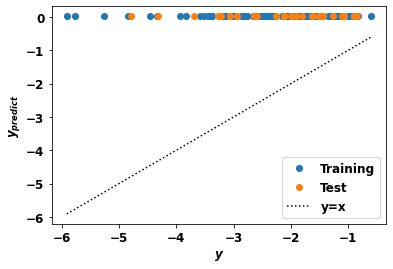

In [50]:
model = ConcreteModel()

model.set = Set(initialize=range(1,117))

model.epsilon = 0.001
model.C = 1e-7

model.b0 = Var()
model.b1 = Var()
model.b2 = Var()
model.b3 = Var()
model.b4 = Var()
model.b5 = Var()
model.b6 = Var()
model.b7 = Var()
model.b8 = Var()
model.b9 = Var()
model.b10 = Var()
model.b11 = Var()
model.b12 = Var()
model.b13 = Var()

model.zeta = Var(model.set)
model.zeta_star = Var(model.set)

def x0s(model,i):
    return X_train[i-1,0]
model.x_1 = Param(model.set,initialize=x0s)

def x1s(model,i):
    return X_train[i-1,1]
model.x_2 = Param(model.set, initialize=x1s)

def x2s(model,i):
    return X_train[i-1,2]
model.x_3 = Param(model.set,initialize=x2s)

def x3s(model,i):
    return X_train[i-1,3]
model.x_4 = Param(model.set, initialize=x3s)

def x4s(model,i):
    return X_train[i-1,4]
model.x_5 = Param(model.set,initialize=x4s)

def x5s(model,i):
    return X_train[i-1,5]
model.x_6 = Param(model.set, initialize=x5s)

def x6s(model,i):
    return X_train[i-1,6]
model.x_7 = Param(model.set,initialize=x6s)

def x7s(model,i):
    return X_train[i-1,7]
model.x_8 = Param(model.set, initialize=x7s)

def x8s(model,i):
    return X_train[i-1,8]
model.x_9 = Param(model.set, initialize=x8s)

def x9s(model,i):
    return X_train[i-1,9]
model.x_10 = Param(model.set,initialize=x9s)

def x10s(model,i):
    return X_train[i-1,10]
model.x_11 = Param(model.set, initialize=x10s)

def x11s(model,i):
    return X_train[i-1,11]
model.x_12 = Param(model.set, initialize=x11s)

def x12s(model,i):
    return X_train[i-1,12]
model.x_13 = Param(model.set, initialize=x12s)


def x13s(model,i):
    return X_train[i-1,12]
model.x_14 = Param(model.set, initialize=x1s)




def ys(model,i):
    return np.array(y[i-1])
model.y = Param(model.set, initialize=ys)

def con1(model,i):
    return model.y[i] - (model.b1*model.x_1[i] + model.b2*model.x_2[i] + model.b3*model.x_3[i] + model.b4*model.x_4[i]+
                         model.b5*model.x_5[i] + model.b6*model.x_6[i] + model.b7*model.x_7[i]+
                         model.b8*model.x_8[i] + model.b9*model.x_9[i] + model.b10*model.x_10[i]+
                         model.b11*model.x_11[i] + model.b12*model.x_12[i] + model.b13*model.x_13[i]) - model.b0 <= model.epsilon + model.zeta[i]
model.con1 = Constraint(model.set,rule=con1)

def con2(model,i):
    return -model.y[i] + (model.b1*model.x_1[i] + model.b2*model.x_2[i] + model.b3*model.x_3[i] + model.b4*model.x_4[i]
                        +model.b5*model.x_5[i] + model.b6*model.x_6[i] + model.b7*model.x_7[i]+
                        model.b8*model.x_8[i] + model.b9*model.x_9[i] + model.b10*model.x_10[i]+
                        model.b11*model.x_11[i] + + model.b12*model.x_12[i] + model.b13*model.x_13[i]) + model.b0 <= model.epsilon + model.zeta_star[i]
model.con2 = Constraint(model.set,rule=con2)

def con3(model,i):
    return model.zeta[i] >= 0
model.con3 = Constraint(model.set,rule=con3)

def con4(model,i):
    return model.zeta_star[i] >= 0
model.con4 = Constraint(model.set,rule=con4)

def obj_rule(model):
    return 0.5*((model.b1**2 + model.b2**2+
                model.b3**2 + model.b4**2+
                model.b5**2 + model.b6**2+
                model.b7**2 + model.b8**2+
                model.b9**2 + model.b10**2+
                model.b11**2) + 
                model.C*sum(model.zeta[i]+model.zeta_star[i] for i in model.set))
model.obj = Objective(rule=obj_rule)


solver=SolverFactory('ipopt')
solver.solve(model)
print (value(model.obj))
yhat_train = (value(model.b0) + value(model.b1)*X_train[:,0] + value(model.b2)*X_train[:,1] + 
       value(model.b3)*X_train[:,2] + value(model.b4)*X_train[:,3]+
       value(model.b5)*X_train[:,4] + value(model.b6)*X_train[:,5]+
       value(model.b7)*X_train[:,6] + value(model.b8)*X_train[:,7]+
       value(model.b9)*X_train[:,8] + value(model.b10)*X_train[:,9]+
       value(model.b11)*X_train[:,11] + value(model.b12)*X_train[:,12])

yhat_test = (value(model.b0) + value(model.b1)*X_test[:,0] + value(model.b2)*X_test[:,1] + 
       value(model.b3)*X_test[:,2] + value(model.b4)*X_test[:,3]+
       value(model.b5)*X_test[:,4] + value(model.b6)*X_test[:,5]+
       value(model.b7)*X_test[:,6] + value(model.b8)*X_test[:,7]+
       value(model.b9)*X_test[:,8] + value(model.b10)*X_test[:,9]+
       value(model.b11)*X_test[:,11] + value(model.b12)*X_test[:,12])

fig, ax = plt.subplots()

ax.plot(y_train,yhat_train, 'o')
ax.plot(y_test,yhat_test, 'o')

ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k:')
ax.set(
#     xlim=[min(y_train), max(y_train)],
#     ylim=[min(y_train), max(y_train)],
    xlabel='$y$',
    ylabel='$y_{predict}$'
)
ax.legend(['Training', 'Test', 'y=x'])

b0 = (value(model.b0))
b1 = (value(model.b1))
b2 = (value(model.b2))
b3 = (value(model.b3))
b4 = (value(model.b4))
b5 = (value(model.b5))
b6 = (value(model.b6))
b7 = (value(model.b7))
b8 = (value(model.b8))
b9 = (value(model.b9))
b10 = (value(model.b10))
b11 = (value(model.b11))
b12 = (value(model.b12))
b13 = (value(model.b13))

mean_squared_error(y_test, yhat_test)

#### Optimization:

In [51]:
model = ConcreteModel()
model.cont = np.arange(5)
model.bin = np.arange(8)
model.xcont = Var(model.cont, within = Reals)
model.xbin = Var(model.bin, within = Binary)

#Define Objective
model.obj = Objective(expr = b0 + b1*model.xcont[0] + b2*model.xcont[1] + b3*model.xcont[2] + b4*model.xcont[3]
                      + b5*model.xcont[4] + b6*model.xbin[0] + b7*model.xbin[1]+ b8*model.xbin[2] 
                      + b9*model.xbin[3] + b10*model.xbin[4] + b11*model.xbin[5] + b12*model.xbin[6]
                      + b13*model.xbin[7], sense = maximize)

#Constraints on the non-scaled x values 
model.con1 = Constraint(expr = model.xcont[0]*sd[0]+avg[0] >= 1) #Mw >= 1 
model.con2 = Constraint(expr = model.xcont[0]*sd[0]+avg[0] <= 120) #Mw <= 120
model.con3 = Constraint(expr = model.xcont[1]*sd[1]+avg[1] >= 1) #PDI >= 1
model.con4 = Constraint(expr = model.xcont[1]*sd[1]+avg[1] <= 2.5) #PDI <= 2.5
model.con5 = Constraint(expr = model.xcont[2]*sd[2]+avg[2] >= 0) #Concentration >= 0
model.con6 = Constraint(expr = model.xcont[2]*sd[2]+avg[2] <= 10) #Concentration <= 10
model.con7 = Constraint(expr = model.xcont[3]*sd[3]+avg[3] >= 334) #Boiling Point >= 334 
model.con8 = Constraint(expr = model.xcont[3]*sd[3]+avg[3] <= 487) #Boiling Point <= 487
model.con9 = Constraint(expr = model.xcont[4]*sd[4]+avg[4] >= 2) #Hansen Radius >= 2
model.con10 = Constraint(expr = model.xcont[4]*sd[4]+avg[4] <= 6) #Hansen Radius <=6
model.con11 = Constraint(expr = model.xbin[3]+model.xbin[4] == 1) #Configuration = 1 
model.con12 = Constraint(expr = model.xbin[5]+model.xbin[6]+model.xbin[7] ==1) #Deposition = 1


solver = SolverFactory('baron')
solver.solve(model)

model.pprint()

2 Set Declarations
    xbin_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    8 : {0, 1, 2, 3, 4, 5, 6, 7}
    xcont_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

2 Var Declarations
    xbin : Size=8, Index=xbin_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
    xcont : Size=5, Index=xcont_index
        Key : Lower : 

In [52]:
#Optimization Results 

X = np.zeros((5,1))
for i in range(5):
    X[i] = value(model.xcont[i])*sd[i]+avg[i] 

Obj = value(model.obj)*sdy+avgy
Obj = 10**Obj

print("Maximim Mobility:",Obj)
print("Optimal MW:", X[0])
print("Optimal PDI:", X[1])
print("Optimal Initial Concentration:", X[2])
print("Optimal Boiling Point:", X[3])
print("Optimal Hansen Radius:", X[4])
print("Substrate Treatment: none")
print("Annealed:", value(model.xbin[1]))
print("Aged:", value(model.xbin[2]))
print("OFET Configuration_BGBC:", value(model.xbin[3]))
print("OFET Configuration_BGTC:", value(model.xbin[4]))
print("Deposition Method_DIPPED:", value(model.xbin[5]))
print("Deposition Method_DROPPED", value(model.xbin[6]))
print("Deposition Method_SPUN:", value(model.xbin[7]))

Maximim Mobility: 0.006421042832649406
Optimal MW: [120.]
Optimal PDI: [2.5]
Optimal Initial Concentration: [0.]
Optimal Boiling Point: [334.]
Optimal Hansen Radius: [6.]
Substrate Treatment: none
Annealed: 0.0
Aged: 0.0
OFET Configuration_BGBC: 0.0
OFET Configuration_BGTC: 1.0
Deposition Method_DIPPED: 0.0
Deposition Method_DROPPED 0.0
Deposition Method_SPUN: 1.0


### 5. Gaussian Process Modeling

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn import gaussian_process as gp
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.gaussian_process.kernels import RBF

#Perform a single train-test split
X_train, X_test, y_train, y_test = train_test_split(Xsc, ysc, test_size=0.2, random_state=15)

#Kernel
kernel = RBF()

# Gaussian Process Parameters
gp_params = {'kernel': kernel,
             'alpha': 1e-10,
             'copy_X_train': True,
             'n_restarts_optimizer':0,
             'normalize_y':False
}

# Initiate the Gaussian process
model = gp.GaussianProcessRegressor(kernel=kernel, normalize_y=True)

model.fit(X_train, -y_train)

# Objective function
scoring = 'mean_squared_error'
refit = True

print("Parameters of Estimator:", model.get_params(deep=True))

Parameters of Estimator: {'alpha': 1e-10, 'copy_X_train': True, 'kernel__length_scale': 1.0, 'kernel__length_scale_bounds': (1e-05, 100000.0), 'kernel': RBF(length_scale=1), 'n_restarts_optimizer': 0, 'normalize_y': True, 'optimizer': 'fmin_l_bfgs_b', 'random_state': None}


coefficient of determination R^2 of the prediction: 0.97065623722042
coefficient of determination R^2 of the prediction: 0.045032284819106705
MSE: 0.9750515685808061
Standard-Deviation: [0.00000000e+00 9.84914760e-01 0.00000000e+00 0.00000000e+00
 9.84914760e-01 0.00000000e+00 9.84914760e-01 9.84914760e-01
 9.84914760e-01 9.84914760e-01 0.00000000e+00 9.84914760e-01
 9.84914760e-01 9.84914760e-01 9.84914760e-01 0.00000000e+00
 9.84914760e-01 9.84914760e-01 9.84914760e-01 9.84914760e-01
 0.00000000e+00 0.00000000e+00 9.84914760e-01 0.00000000e+00
 9.84914760e-01 9.84914801e-06 9.84914760e-01 9.84914760e-01
 9.84914760e-01 9.84914760e-01]


C:\Users\Alpha Tauri\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:370: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


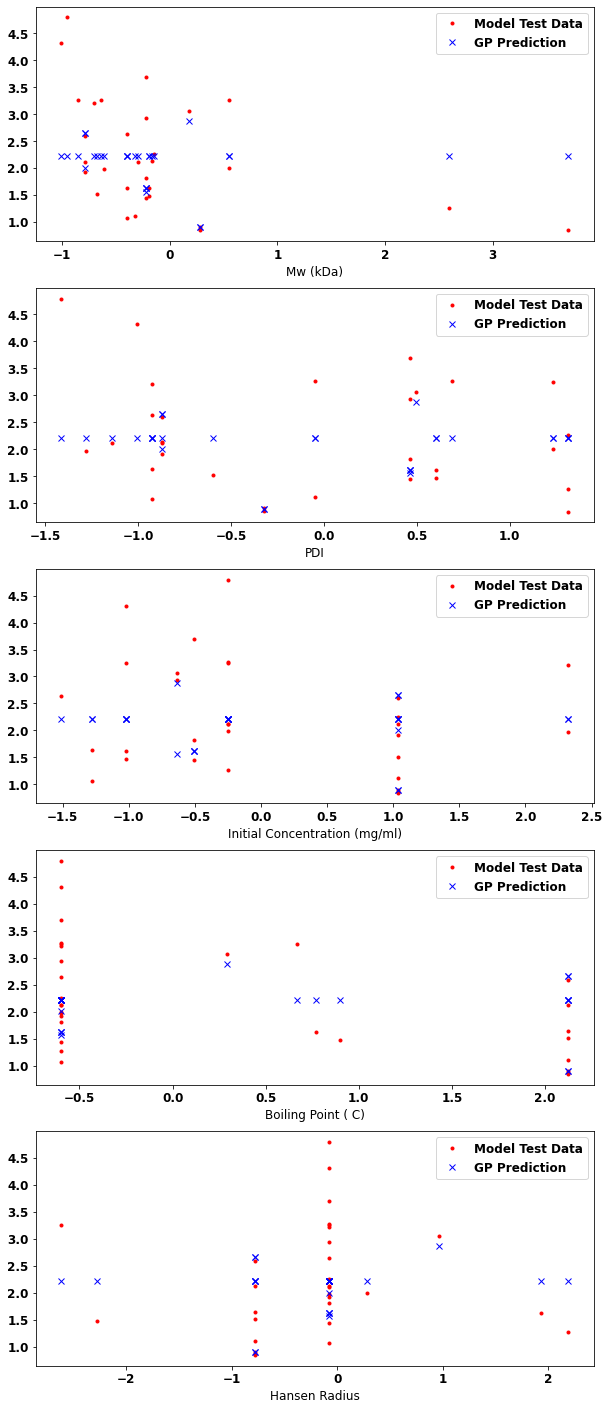

In [54]:
# Predict with test set
y_pred, sigma = model.predict(X_test, return_std=True)
print("coefficient of determination R^2 of the prediction:", model.score(X_train, -y_train))
print("coefficient of determination R^2 of the prediction:", model.score(X_test, -y_test))
print("MSE:", mean_squared_error(y_pred, -y_test), )
print("Standard-Deviation:", sigma)

fig, axes = plt.subplots(5, 1, figsize=(10,25))

for i, varname_i in enumerate(varnames[:5]): #Only the continuous variables
    
    axes[i].plot(X_test[:,i], -y_test, 'r.', marker='.', label='Model Test Data')
    axes[i].plot(X_test[:,i], y_pred, 'b.', marker='x', label='GP Prediction')
    axes[i].set_xlabel(varname_i)
    axes[i].legend()

plt.show()

0.9750515685808061

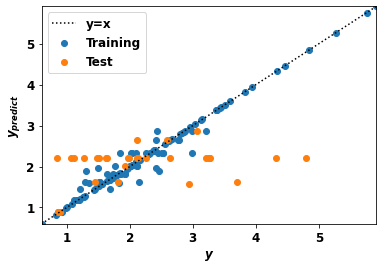

In [55]:
fig, ax = plt.subplots()

ax.scatter(-y_train, model.predict(X_train))
ax.scatter(-y_test,  y_pred)
ax.plot([min(-y_train), max(-y_train)], [min(-y_train), max(-y_train)], 'k:')
ax.set(
    xlim=[min(-y_train), max(-y_train)],
    ylim=[min(-y_train), max(-y_train)],
    xlabel='$y$',
    ylabel='$y_{predict}$'
)
ax.legend(['y=x', 'Training', 'Test'])

mean_squared_error(-y_test, y_pred)

#### Optimization:

In [56]:
from scipy.optimize import minimize

# def fittedGPM(X):
#     return -model.predict(Xsc)

x0 = [2.5, 1.3, -0.25, -0.59, 0.88, 1, 1, 1, 1, 0, 1, 0, 0]

def con_config(x):
    return x[8] + x[9] - 1
def con_deposition(x):
    return x[10] + x[11] + x[12] - 1

cons = [{'type':'eq', 'fun': con_config},
       {'type':'eq', 'fun': con_deposition}
       ]

bnds = (
    (-1.04464867,  1.0560773),  #Mw - see constraints in report
    (-2.23620341,  1.86051747), #PDI
    (-1.54011663,  1.03556525), #Concentration
    (-0.59698925,  2.12413977), #Boiling Point
    (-4.18976036,  5.89877658), #Hansen Radius
    (0,1), #All other binary variables
    (0,1),
    (0,1),
    (0,1),
    (0,1),
    (0,1),
    (0,1),
    (0,1),
)

# for i,bnd in enumerate(bnds):
#     if i<5:
#         bnds[i] = (bnd-avg[i])/sd[i]

res = minimize(lambda x: model.predict(np.array([x])), x0, method='SLSQP', bounds=bnds, tol=1e-6, constraints=cons, options={'disp':True})
res

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.2155929634856677
            Iterations: 1
            Function evaluations: 14
            Gradient evaluations: 1


     fun: 2.2155929634856677
     jac: array([-0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0.])
 message: 'Optimization terminated successfully'
    nfev: 14
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([ 1.0560773,  1.3      , -0.25     , -0.59     ,  0.88     ,
        1.       ,  1.       ,  1.       ,  1.       ,  0.       ,
        1.       ,  0.       ,  0.       ])

In [57]:
#Optimization Results 

X = np.zeros((13,1))
for i in range(len(res.x)):
    if i < 6:
        X[i] = res.x[i]*sd[i]+avg[i] 
    else:
        X[i] = res.x[i]

Obj = res.fun*sdy+avgy
Obj = 10**Obj

print("Maximum Mobility:",Obj)
print("Optimal MW:", X[0])
print("Optimal PDI:", X[1])
print("Optimal Initial Concentration:", X[2])
print("Optimal Boiling Point:", X[3])
print("Optimal Hansen Radius:", X[4])
print("Substrate Treatment: none")
print("Annealed:", X[6])
print("Aged:", X[7])
print("OFET Configuration_BGBC:", X[8])
print("OFET Configuration_BGTC:", X[9])
print("Deposition Method_DIPPED:", X[10])
print("Deposition Method_DROPPED", X[11])
print("Deposition Method_SPUN:", X[12])

Maximum Mobility: 0.9420724841202958
Optimal MW: [119.99999982]
Optimal PDI: [2.29476849]
Optimal Initial Concentration: [5.00883529]
Optimal Boiling Point: [334.39298216]
Optimal Hansen Radius: [4.01010727]
Substrate Treatment: none
Annealed: [1.]
Aged: [1.]
OFET Configuration_BGBC: [1.]
OFET Configuration_BGTC: [0.]
Deposition Method_DIPPED: [1.]
Deposition Method_DROPPED [0.]
Deposition Method_SPUN: [0.]


### 6. Neural Network

In [58]:
from sklearn.neural_network import MLPRegressor

# We need this so that we search over many parameters that define the NN structure:
from sklearn.model_selection import GridSearchCV

#create model structure:
model = MLPRegressor(max_iter=5000, validation_fraction = 0.2,tol=1e-2)

#Define the parameters to search over for:
param_grid = {'activation': ['tanh'],
                'solver':['adam'],
                'alpha' : [0.001, 0.01],
                'hidden_layer_sizes':[(i,) for i in np.arange(3,30,5)],
             }

#This grid search will automatically search over parameter values, and try to identify model with best architecture:
grid = GridSearchCV(model, param_grid,  cv = 3, verbose=0)

grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MLPRegressor(max_iter=5000, tol=0.01,
                                    validation_fraction=0.2),
             param_grid={'activation': ['tanh'], 'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(3,), (8,), (13,), (18,), (23,),
                                                (28,)],
                         'solver': ['adam']})

1.2279663547296333


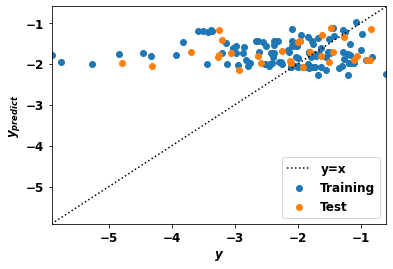

In [59]:
yhat = grid.predict(X_test)

print(mean_squared_error(y_test, yhat))

fig, ax = plt.subplots()

ax.scatter(y_train, grid.predict(X_train))
ax.scatter(y_test,  yhat)
ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k:')
ax.set(
    xlim=[min(y_train), max(y_train)],
    ylim=[min(y_train), max(y_train)],
    xlabel='$y$',
    ylabel='$y_{predict}$'
)
ax.legend(['y=x', 'Training', 'Test'])

In [60]:
print("coefficient of determination R^2 of the prediction:", grid.score(X_train, y_train))
print("Mean cross-validated score of the best_estimator:",grid.best_score_)

coefficient of determination R^2 of the prediction: -0.35978745507846543
Mean cross-validated score of the best_estimator: -0.5105284066948457
